**Author:- Ganesh Morye**

# General Notes
This notebook contains all the code related to the modeling phase of this project. The notebook has three main primary sections:
- Libaries and Data Imports
- Data preprocessing to get it ready for modeling
- Modeling using LDA and GSDMM
The notebook is formatted to include a much detailed view of the outline as a Table of Contents

# Motivation behind the Project
Twitter is one of the most popular social media platforms, and it currently has over [396.5 million](https://backlinko.com/twitter-users) users. Twitter is a microblogging and social networking service. Users post *tweets*, short text messages to interact with their followers. The text content of a tweet can contain up to 280 characters. Users can post and talk about any topic they wish to, provided they do not violate the Twitter rules. Given the open platform nature of the service, Twitter attracts a wide range and variety of users and topics, and users of the platform use it as an outlet to discuss and inform their viewpoints. Twitter is a valuable text mining data pool that can be leveraged to discover the underlying themes of conversations happening at any given time. E.g., an organization would like to understand the discussions around their products. However, manually reading and making sense of all the tweets to identify the themes and topics of discussions is not always practical. A text mining approach can be adopted to get a *big picture* idea of general discussion topics. Topic modeling can help distill information into a more usable and actionable format.<br>
I analyze the Twitter activity of users from **India** over the last two years (Sep-2019 to Sep-2020). *Topic models* are used to discover and identify trends in the underlying themes in the topics being discussed on the platform. COVID played a big part in the last two years and greatly influenced how users interacted on social media platforms. Topic models can provide insights into any specific trends that could correlate with the rise and the fall in the number of COVID cases in India. Since topic modeling is an unsupervised machine learning technique, our analysis and results are driven by how well the topic models capture the relevant topics. 
# Problem Statement
As a data science engineer at Twitter-India, I am tasked to improve Twitter's search algorithm to show more context-based results rather than just query-based results. I use topic models to discover latent themes in the users' posts specifically originating from India to improve the search engine's performance. Helping users find relevant information will lead to more engagement on the platform and drive user monetization.

# What is Topic Modeling?

**Introduction** - Topic modeling is a text mining technique which falls under the category of unsupervised machine learning models. It is unsupervised as we do not have to provide tags or labels for the documents. Topic models will determine the *topics* being discussed. It works on the premise that each document is mixture of topics and each topic is a collection of words. Topic models helps users filter out a collection of documents based on the general themes present in the collection. Topic models allow us to answer big-picture questions quickly, cheaply and without human intervention ([Jordan Boyd-Graber](https://mimno.infosci.cornell.edu/papers/2017_fntir_tm_applications.pdf)).
Topic models are probablistic in nature. In topic models, words which are similar in nature are grouped together and then a probablisitic distribution is used to determine the topics based on the statistical probability that these words will occur together. Documents are not restricted to discussing a single topic. It could talk about multiple topics but primarily focus on a one or two topics. A topic model reveals the topics being discussed in each document by assigning a probability distribution to all the topics that are being discussed in the corpus. By using these probability values, each document can be labeled to be discussing a particular topic. 

**Topic Modeling Use Cases** - 
[This](https://highdemandskills.com/topic-modeling-intuitive/#h2-2) is a great resource for applications of topic modeling. [Jordan Boyd-Graber](https://mimno.infosci.cornell.edu/papers/2017_fntir_tm_applications.pdf) provide a much comprehensive overview of the applications of the topic modeling.


**Algorithms** - LSA and LDA are two of most used topic modeling algorithms. LSA stands for latent semantic analysis and LDA stands for latent dirichlet allocation. [LSA](https://monkeylearn.com/blog/introduction-to-topic-modeling/) computes how frequently words occur in the documents – and the whole corpus – and assumes that similar documents will contain approximately the same distribution of word frequencies for certain words. In this case, syntactic information (e.g. word order) and semantic information (e.g. the multiplicity of meanings of a given word) are ignored and each document is treated as a bag of words. The main difference between LSA and LDA is that LDA assumes that the distribution of topics in a document and the distribution of words in topics are Dirichlet distributions. LSA does not assume any distribution and therefore, leads to more opaque vector representations of topics and documents.
There are two hyperparameters in an LDA model. These hyperparameters control the number of topics that can be associated with a particular document and the number of words that can be associated with a given topic. It is basically a way to tune overlap between topics and words. These two hyperparameters are `alpha` and `beta`. `alpha` is used to tune how many topics are assigned to a given document. A lower value will assign fewer topics. `beta` is used to tune the number of words to model a topic. A lower value of `beta` will assing fewer words to a given topic. For the LDA models, number of topics are provided as one of the hyperparameters.
While LDA and LSA models work very well on larger texts, they do not work very well with short texts such as tweets. LDA assumes that a given document has a distribution of topics. Shorter texts such as tweets most likely talk about a single topic. So the performance of typical LDA modeling approaches tend to not do better on short text topic modeling (STTM). Tweets fall into the category of STTM. STTM approaches work on the assumptin that a given document is made up of only one topic. The python implementation of STTM, follows the Gibbs sampling algorithm for Dirichleet Mixture Model(GSDMM) of [Yin and Wang, 2014](https://www.semanticscholar.org/paper/A-dirichlet-multinomial-mixture-model-based-for-Yin-Wang/d03ca28403da15e75bc3e90c21eab44031257e80?p2df). Their paper discusses the intuition behind the GSDMM as a Movie Group Process. In the words of the author a movie group process could be described as:
"*The intuition of MGP is that we can randomly assign the students to K tables, then we ask each student to re-choose a table in turn with two rules: 1) Choose a table with more students; 2) Choose a table whose students share similar interests with him. As this process goes on, some tables will grow larger and others will vanish. Finally, only a part of the tables will still have students and the students in each table will share similar interests.*"

In this project, I test out both the LDA and STTM approaches for modeling the tweets data. Since LDA models are the most widely used models for topic modeling purposes, they are very well supported. STTM model are relatively a newer approach and their implementation in Python lack the same level of support as LDA. Hence, I have used LDA to carry out a more extensive and in-depth modeling study. For the STTM, I have developed a single model to compare the performances.





In [ ]:
# Making sure how much of the available RAM is the notebook using when run on Google Colab
import sys
if 'google.colab' in sys.modules:
  from psutil import virtual_memory
  ram_gb = virtual_memory().total / 1e9
  print('Your runtime has {:.1f} gigabytes of available RAM\n'.format(ram_gb))

  if ram_gb < 20:
    print('Not using a high-RAM runtime')
  else:
    print('You are using a high-RAM runtime!')

Your runtime has 37.8 gigabytes of available RAM

You are using a high-RAM runtime!


# Installations

In [ ]:
# Installations - Takes 2-3 mins to run. Mainly the spacy download
import sys
if 'google.colab' in sys.modules:
    !pip install swachhdata
    !pip install emoji --upgrade
    #!pip install pandas-profiling==2.*
    #!pip install -U pandas-profiling
    !pip install plotly==4.*
    !python -m spacy download en_core_web_lg
    !pip install pyldavis
    !pip install gensim
    !pip install chart_studio
    !pip install --upgrade autopep8
    !pip install git+https://github.com/rwalk/gsdmm.git
    !pip install joblib

     |████████████████████████████████| 170 kB 6.2 MB/s 
     |████████████████████████████████| 101 kB 9.6 MB/s 
     |████████████████████████████████| 321 kB 32.8 MB/s 
     |████████████████████████████████| 284 kB 56.5 MB/s 
  Created wheel for emoji: filename=emoji-1.6.1-py3-none-any.whl size=169314 sha256=490afc60631e0bc1496313c0bbffad4eae412903f029d4f823882d982ffbca10
  Stored in directory: /root/.cache/pip/wheels/ea/5f/d3/03d313ddb3c2a1a427bb4690f1621eea60fe6f2a30cc95940f
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85455 sha256=04be3cae4f02539420fb384afe093847ebe27586a64f00c13cb66d4e12fa25e2
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built emoji pyahocorasick
     |████████████████████████████████| 827.9 MB 1.1 MB/s 
  Created wheel for en-core-web-lg: filename=en_core_web_lg-2.2.5-py3-none-any.whl size=829180942 sha256=20411df89dbd0b3ac2cea9398469f

     |████████████████████████████████| 64 kB 2.0 MB/s 
     |████████████████████████████████| 45 kB 1.6 MB/s 
     |████████████████████████████████| 42 kB 630 kB/s 
  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-vrt7qbab
  Running command git clone -q https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-vrt7qbab
  Created wheel for gsdmm: filename=gsdmm-0.1-py3-none-any.whl size=4603 sha256=11b4de2840579281d0f8cfea6acdaf72d6110fcb59482f72d9ee97266642aec8
  Stored in directory: /tmp/pip-ephem-wheel-cache-hgfw3iml/wheels/34/65/a6/7eef67b88abae954fecd22587bd755c27b58a9ffe488d6b0de
Successfully built gsdmm


# Imports and Variables Setup

In [ ]:
# Setting the import directors for loading files and models
try:
    from google.colab import drive
    csv_dir = '/content/drive/My Drive/Colab_Notebooks/Topic_Modeling/output/data'
    models_dir = '/content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models'
    csv_file = 'master_tweets.csv'
    code_in = 'Google Colab'
    drive.mount('/content/drive', force_remount=True)
except:
    csv_dir = '../output/data'
    models_dir = '../models'
    csv_file = 'master_tweets.csv'
    code_in = 'Local Machine'

print(f'Code is run from {code_in}')

Mounted at /content/drive
Code is run from Google Colab


In [ ]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

# os libraries
from pathlib import Path
import pickle
import os, glob

# Required Libraries

# Base Python Libraries
import json
import requests
import pandas as pd
import numpy as np
from tqdm import tqdm
import re
from collections import OrderedDict, Counter
import string
from ast import literal_eval

# Datetime utilities
import datetime
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import calendar

#Visualizations
import plotly.express as px
import pyLDAvis.gensim_models
import chart_studio
import chart_studio.plotly as py 
import chart_studio.tools as tls
import matplotlib.colors as mcolors
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker
import matplotlib.dates as mdates

#Natural Language Processing (NLP)
import emoji
import spacy
import gensim
from spacy.tokenizer import Tokenizer
from gensim.corpora import Dictionary
from gensim.models.ldamulticore import LdaMulticore
from gensim.models.coherencemodel import CoherenceModel
from sklearn.decomposition import LatentDirichletAllocation
from joblib import Parallel, delayed
from swachhdata.text import *
from gensim.parsing.preprocessing import STOPWORDS as SW
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)






# Data Cleaning

Reading in the scraped tweet dataset, filtering it by the country India, and text cleaning to remove URLs, emojis, contractions, hashtags and mentions and to lower-case text

In [ ]:
# df = pd.read_csv(os.path.join(csv_dir, csv_file), index_col=None)
df = pd.read_csv(os.path.join(csv_dir, csv_file), usecols = ['content', 'date', 'countryCode' ],index_col=None)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning:

Columns (3,4,60) have mixed types.Specify dtype option on import or set low_memory=False.



In [ ]:
df.head(2)

,date,content,countryCode
0,2019-10-29 20:23:57+00:00,Three generations celebrating Bhai Phonta at Lal Pishi's house (Roma Ray). https://t.co/yqisRjKoa5,IN
1,2019-10-29 17:21:34+00:00,"Just delighted to score my 1st goal with new tem hyderabad. We need to improve a lot and is very difficult to play an game without the whole squad available, but we accepted the challenge. 👊🏻",IN


**Parsing the Date column to a DateTime Object**

In [ ]:
df['date'] = pd.to_datetime(df['date'], utc=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050897 entries, 0 to 1050896
Data columns (total 3 columns):
 #   Column       Non-Null Count    Dtype              
---  ------       --------------    -----              
 0   date         1001660 non-null  datetime64[ns, UTC]
 1   content      1001660 non-null  object             
 2   countryCode  653056 non-null   object             
dtypes: datetime64[ns, UTC](1), object(2)
memory usage: 24.1+ MB


In [ ]:
df = df[df['countryCode']=='IN']

In [ ]:
df.shape

(464777, 3)

In [ ]:
df.head(2)

In [ ]:
df.columns

In [ ]:
df.index

In [ ]:
# for preprocessing the tweets using the swachdataAPI, split the df into 2 sets as there was some error which was getting caught after 2 hrs. so to speed up catching the error df was split
# each split was saved to a csv file swach1 and swach2 which will later be concatenated
df_test = df.loc[df.index[200000:]].copy()

In [ ]:
df_test.index

## SwachData API - Cleaning Tweets

In [ ]:
# pre-processing tweet text using swachhdata API

tqdm.pandas()
def swach_preprocess(text):
  # print(text)

  # got an indexerror in the contractions argument. possibly related to one word tweets. preprocessing only the tweets that would have more than 4 words
  if len(text.split()) <=4:
    return 'short_tweet', [], []

  
  # Recast text data by removing or extracting URLs.. For eg 
  # text = ''You can have a look at our catalogue at www.samplewebsite.com in the services tab''
  # 'You can have a look at our catalogue at in the services tab '
  # source: https://swachhdata.readthedocs.io/en/latest/User%20Guide/Text/urlRecast.html
  try:
    url = urlRecast(process='remove')
    text = url.setup_recast(text)
  except:
    print(text)
    return 'urlRecastError', [], []
  

  # Recast text data by removing HTML tags.
  # text = '<a href="www.samplewebsite.com">Click Here</a> to have a look at the menu in the services tab'
  # Click Here to have a look at the menu in the services tab
  try:
    rec = htmlRecast()
    text = rec.setup_recast(text)
  except:
    print(text)
    return 'htmlRecastError', [], []

  # Recast text data by removing Escape Sequences.
  # text = 'To have a look at the menu\nClick Here'
  # 'To have a look at the menu Click Here'
  try:
    rec = EscapeSequenceRecast()
    text = rec.setup_recast(text)
  except:
    print(text)
    return 'EscapeSequenceRecastError', [], []

  # Recast text data by removing or extracting Mentions.
  # text = 'If you like the service we offer, post a review on google and tag us @jondoe'
  # 'If you like the service we offer, post a review on google and tag us'
  try:
    rec = MentionRecast(process='extract_remove')
    ls_mentions = []
    text, ls_mentions = rec.setup_recast(text)
  except:
    print(text)
    return 'MentionRecastError', [], []

  # df['mentions'] = rec.mention_
  # ls_mentions = rec.mention_

  # Recast text data by expanding Contractions
  # text = 'They're going to wildlife sanctuary, I guess Jon's going to be there too.'
  # 'They are going to wildlife sanctuary, I guess Jon is going to be there too.'
  # there is an alternative (better?) way of doing this using contractions library
  try:
    rec = ContractionsRecast()
    text = rec.setup_recast(text)
  except:
    print(text)
    return 'ContractionRecastError', [], []

  # Recast text data by case formatting the text
  # text = 'You can have a look at our catalogue in the services tab'
  # 'you can have a look at our catalogue in the services tab'
  try:
    rec = CaseRecast(process='lower')
    text = rec.setup_recast(text)
  except:
    return 'CastRecastError', [], []

  # Recast text data by removing or extracting Hashtag(s).
  # text = 'Post a photo with tag #samplephoto to win prizes'
  # 'Post a photo with tag to win prizes'
  try:
    rec = HashtagRecast(process='extract_remove')
    ls_hashtags = []
    text, ls_hashtags = rec.setup_recast(text)
  except:
    print(text)
    return 'HashtagRecastError', [], []
  # ls_hashtags = rec.hashtag_

  # Recast text data by removing, replacing or extracting numbers.
  # text = 'The sales turnover of quarter 1 this year was $ 123456'
  # 'The sales turnover of quarter  this year was $ '
  rec = NumberRecast(process='remove')
  text = rec.setup_recast(text)

  # Recast text data by removing punctuations.
  try:
    rec = PunctuationRecast()
    text = rec.setup_recast(text)
  except:
    print(text)
    return 'PunctuationRecastError', [], []

  # replace the emojis with its english translation. For eg 
  # text = 'Thanks a lot for your wishes! 😊'
  # 'Thanks a lot for your wishes! smiling_face_with_smiling_eyes '
  # source: https://swachhdata.readthedocs.io/en/latest/User%20Guide/Text/EmojiRecast.html
  try:
    rec = EmojiRecast(process='remove')
    text = rec.setup_recast(text)
  except:
    print(text)
    return 'EmojiRecastError', [], []

  # Recast text data by removing all accented, non ascii characters and keeping only alphabets.
  # text = 'It was past lunch time so the 3 of us dropped by The Main Street Café ☕️ for a late lunch 🍛'
  # 'It was past lunch time so the   of us dropped by The Main Street Cafe  for a late lunch '
  try:
    rec = AlphabetRecast(process = 'all')
    text = rec.setup_recast(text)
  except:
    print(text)
    return 'AlphabetRecastError', [], []
  
  return text, ls_mentions, ls_hashtags


df_test['swach_content'],  df_test['mentions'], df_test['hashtags'] = zip(*df_test['content'].progress_apply(swach_preprocess))


In [ ]:
swach_file = 'swachtweets2.csv'
# df_test.to_csv(os.path.join(csv_dir, swach_file))

In [ ]:
swach_file = 'swachtweets2.csv'
pd.read_csv(os.path.join(csv_dir, swach_file), index_col='Unnamed: 0')

In [ ]:
swach_file = 'swachtweets1.csv'
df_swach1 = pd.read_csv(os.path.join(csv_dir, swach_file), index_col='Unnamed: 0')

In [ ]:
swach_file = 'swachtweets2.csv'
df_swach2 = pd.read_csv(os.path.join(csv_dir, swach_file), index_col='Unnamed: 0')

In [ ]:
df_swach = pd.concat([df_swach1, df_swach2], axis=0)
df_swach

In [ ]:
df_swach1=[]
df_swach2=[]
df = []

In [ ]:
# pd.options.display.max_rows = 100
# pd.options.display.max_colwidth = 300
# display(df.sort_values(by='length').head(100))

In [ ]:
df_swach.shape

In [ ]:
# mask = (df_swach['swach_content'] != 'short_tweet') | (df_swach['swach_content'] != 'ContractionRecastError')
mask = (~df_swach['swach_content'].isin(['short_tweet', 'ContractionRecastError']))
df_swach = df_swach.loc[mask,:]

In [ ]:
def swach_tweet_length(x):
  try:
    l = len(x.split())
    return l
  except AttributeError:
    return -1


df_swach['length'] = df_swach['swach_content'].apply(swach_tweet_length)

In [ ]:
mask = (df_swach['length'] <= 4 )
df_swach = df_swach.loc[~mask]

# Data Pre-processing

## Tokenizing and Lemmatizing

In [ ]:
# Load spacy
# Make sure to restart the runtime after running installations and libraries tab
nlp = spacy.load('en_core_web_lg')

In [ ]:
# creating a list of stopwords, custom+in-built stopwords in libraries
# custom keywords list is created after iterating over the results of clustering

# ALL_STOP_WORDS = spacy + gensim + wordcloud
# custom_stopwords = ['will', 's', 'india', 'day', 'good', 'one', 'today', '-pron-', 'time', 'make', 'people', 'now', 'ji', 'year', 'shri']
# custom_stopwords = ['will', 's', '-pron-', 'ji']
custom_stopwords = ['s', '-pron-']
custom_stopwords2 = [
'india',
 'day',
 'good',
 'today',
 'time',
 'people',
#  'thank',
 'year',
#  'happy',
#  'new',
 'wish',
 'life',
 'love',
#  'come',
 'work',
 'shri',
 'need',
 'delhi',
 'indian',
 'birthday',
 'know',
 'world',
 'great',
 'state',
#  'say',
 'govt',
#  'go',
#  'look',
 'covid',
 'watch']
STOP_WORDS = nlp.Defaults.stop_words.union(custom_stopwords).union(custom_stopwords2)
ALL_STOP_WORDS = STOP_WORDS.union(SW).union(stopwords)
stopwords_set = set(ALL_STOP_WORDS)

In [ ]:

def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in stopwords_set and len(tok) > 2] 
    return lemma_list



def chunker(iterable, total_length, chunksize):
    return (iterable[pos: pos + chunksize] for pos in range(0, total_length, chunksize))

def flatten(list_of_lists):
    "Flatten a list of lists to a combined list"
    return ([item for sublist in list_of_lists for item in sublist])

def process_chunk(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=200):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

def preprocess_parallel(texts, chunksize=100):
    executor = Parallel(n_jobs=7, backend='multiprocessing', prefer="processes")
    do = delayed(process_chunk)
    tasks = (do(chunk) for chunk in chunker(texts, len(df_swach), chunksize=chunksize))
    result = executor(tasks)
    return flatten(result)

In [ ]:
%%time
df_swach['spacy_lemma_tokens'] = preprocess_parallel(df_swach['swach_content'], chunksize=1000)

CPU times: user 4.99 s, sys: 2.61 s, total: 7.6 s
Wall time: 3min 2s


In [ ]:
df_swach

,date,content,countryCode,length,swach_content,mentions,hashtags,spacy_lemma_tokens,tokens_back_to_text
0,2019-10-29,Three generations celebrating Bhai Phonta at Lal Pishi's house (Roma Ray). https://t.co/yqisRjKoa5,IN,12,three generations celebrating bhai phonta at lal pishi s house roma ray,[],[],"[generation, celebrate, bhai, phonta, lal, pishi, house, roma, ray]",generation celebrate bhai phonta lal pishi house roma ray
1,2019-10-29,Just delighted to score my 1st goal with new tem hyderabad. We need to improve a lot and is very...,IN,35,just delighted to score my st goal with new tem hyderabad we need to improve a lot and is very d...,[],[],"[delighted, score, goal, new, tem, hyderabad, improve, lot, difficult, play, game, squad, availa...",delighted score goal new tem hyderabad improve lot difficult play game squad available accept ch...
2,2019-10-29,Always great for an artist to have that Ol’ TrumpLove... #kanyecancelled #KanyeWestJesusIsKing h...,IN,10,always great for an artist to have that old trumplove,[],"['#kanyecancelled', '#kanyewestjesusisking']","[artist, old, trumplove]",artist old trumplove
3,2019-10-29,Hey guys I did a @beatandtrackpod podcast interview about my crazy career and really enjoyed bei...,IN,40,hey guys i did a podcast interview about my crazy career and really enjoyed being grilled by who...,"['@beatandtrackpod', '@stuwhiffen']",[],"[hey, guy, podcast, interview, crazy, career, enjoy, grill, know, stuff, include, link, track, p...",hey guy podcast interview crazy career enjoy grill know stuff include link track playlist song s...
4,2019-10-29,Imagine.... #generalelection2019 ... the Tories win... but #Boris loses his seat... #cosmicjusti...,IN,22,imagine the tories win but loses his seat of course i do not want the tories to win just to be c...,[],"['#generalelection2019', '#boris', '#cosmicjustice']","[imagine, tories, win, lose, seat, course, want, tories, win, clear]",imagine tories win lose seat course want tories win clear
...,...,...,...,...,...,...,...,...,...
1050888,2021-01-24,"Watching live quiz @DRMWaltairECoR from Railway Stadium ,Visakhapatnam friendly T20 match betw...",IN,17,watching live quiz from railway stadium visakhapatnam friendly t match between drm waltairdivisi...,['@DRMWaltairECoR'],[],"[watch, live, quiz, railway, stadium, visakhapatnam, friendly, match, drm, waltairdivision, cmd,...",watch live quiz railway stadium visakhapatnam friendly match drm waltairdivision cmd rinl
1050889,2021-01-24,"Watching live players on the field @DRMWaltairECoR from Railway Stadium ,Visakhapatnam friendly...",IN,20,watching live players on the field from railway stadium visakhapatnam friendly t match between d...,['@DRMWaltairECoR'],[],"[watch, live, player, field, railway, stadium, visakhapatnam, friendly, match, drm, waltairdivis...",watch live player field railway stadium visakhapatnam friendly match drm waltairdivision cmd rinl
1050890,2021-03-24,"Periodt. End of sentence, pararagraph, chapter, &amp; story. ✍️ ✍️ Drop a 🤘if U agree. #repost @...",IN,15,periodt end of sentence pararagraph chapter story drop a you agree spoken english broken english,['@rice_frijoles'],['#repost'],"[periodt, end, sentence, pararagraph, chapter, story, drop, agree, spoken, english, break, english]",periodt end sentence pararagraph chapter story drop agree spoken english break english
1050891,2021-09-17,Wishing our leader Prime Minister of India @narendramodi ji a very Happy Birthday...!!!,IN,12,wishing our leader prime minister of india ji a very happy birthday,['@narendramodi'],[],"[wish, leader, prime, minister, happy]",wish leader prime minister india happy


In [ ]:
df_swach['tokens_back_to_text'] = df_swach['spacy_lemma_tokens'].apply(lambda x : " ".join(x))

In [ ]:
df_swach

,date,content,countryCode,length,swach_content,mentions,hashtags,spacy_lemma_tokens,tokens_back_to_text
0,2019-10-29,Three generations celebrating Bhai Phonta at Lal Pishi's house (Roma Ray). https://t.co/yqisRjKoa5,IN,12,three generations celebrating bhai phonta at lal pishi s house roma ray,[],[],"[generation, celebrate, bhai, phonta, lal, pishi, house, roma, ray]",generation celebrate bhai phonta lal pishi house roma ray
1,2019-10-29,Just delighted to score my 1st goal with new tem hyderabad. We need to improve a lot and is very...,IN,35,just delighted to score my st goal with new tem hyderabad we need to improve a lot and is very d...,[],[],"[delighted, score, goal, new, tem, hyderabad, improve, lot, difficult, play, game, squad, availa...",delighted score goal new tem hyderabad improve lot difficult play game squad available accept ch...
2,2019-10-29,Always great for an artist to have that Ol’ TrumpLove... #kanyecancelled #KanyeWestJesusIsKing h...,IN,10,always great for an artist to have that old trumplove,[],"['#kanyecancelled', '#kanyewestjesusisking']","[artist, old, trumplove]",artist old trumplove
3,2019-10-29,Hey guys I did a @beatandtrackpod podcast interview about my crazy career and really enjoyed bei...,IN,40,hey guys i did a podcast interview about my crazy career and really enjoyed being grilled by who...,"['@beatandtrackpod', '@stuwhiffen']",[],"[hey, guy, podcast, interview, crazy, career, enjoy, grill, know, stuff, include, link, track, p...",hey guy podcast interview crazy career enjoy grill know stuff include link track playlist song s...
4,2019-10-29,Imagine.... #generalelection2019 ... the Tories win... but #Boris loses his seat... #cosmicjusti...,IN,22,imagine the tories win but loses his seat of course i do not want the tories to win just to be c...,[],"['#generalelection2019', '#boris', '#cosmicjustice']","[imagine, tories, win, lose, seat, course, want, tories, win, clear]",imagine tories win lose seat course want tories win clear
...,...,...,...,...,...,...,...,...,...
1050888,2021-01-24,"Watching live quiz @DRMWaltairECoR from Railway Stadium ,Visakhapatnam friendly T20 match betw...",IN,17,watching live quiz from railway stadium visakhapatnam friendly t match between drm waltairdivisi...,['@DRMWaltairECoR'],[],"[watch, live, quiz, railway, stadium, visakhapatnam, friendly, match, drm, waltairdivision, cmd,...",watch live quiz railway stadium visakhapatnam friendly match drm waltairdivision cmd rinl
1050889,2021-01-24,"Watching live players on the field @DRMWaltairECoR from Railway Stadium ,Visakhapatnam friendly...",IN,20,watching live players on the field from railway stadium visakhapatnam friendly t match between d...,['@DRMWaltairECoR'],[],"[watch, live, player, field, railway, stadium, visakhapatnam, friendly, match, drm, waltairdivis...",watch live player field railway stadium visakhapatnam friendly match drm waltairdivision cmd rinl
1050890,2021-03-24,"Periodt. End of sentence, pararagraph, chapter, &amp; story. ✍️ ✍️ Drop a 🤘if U agree. #repost @...",IN,15,periodt end of sentence pararagraph chapter story drop a you agree spoken english broken english,['@rice_frijoles'],['#repost'],"[periodt, end, sentence, pararagraph, chapter, story, drop, agree, spoken, english, break, english]",periodt end sentence pararagraph chapter story drop agree spoken english break english
1050891,2021-09-17,Wishing our leader Prime Minister of India @narendramodi ji a very Happy Birthday...!!!,IN,12,wishing our leader prime minister of india ji a very happy birthday,['@narendramodi'],[],"[wish, leader, prime, minister, happy]",wish leader prime minister happy


In [ ]:
swach_file = 'swachtweets_lemma.csv'
# df_swach.to_csv(os.path.join(csv_dir, swach_file))

In [ ]:

swach_file = 'swachtweets_lemma.csv'
df_swach = pd.read_csv(os.path.join(csv_dir, swach_file), index_col='Unnamed: 0', converters={"spacy_lemma_tokens": literal_eval},  parse_dates=['date']) # when reading the csv, spacy_lemma_tokens which is a list was read as a string

In [ ]:
df_swach.head(2)

,date,content,countryCode,length,swach_content,mentions,hashtags,spacy_lemma_tokens,tokens_back_to_text
0,2019-10-29,Three generations celebrating Bhai Phonta at L...,IN,12,three generations celebrating bhai phonta at l...,[],[],"[generation, celebrate, bhai, phonta, lal, pis...",generation celebrate bhai phonta lal pishi hou...
1,2019-10-29,Just delighted to score my 1st goal with new t...,IN,35,just delighted to score my st goal with new te...,[],[],"[delighted, score, goal, new, tem, hyderabad, ...",delighted score goal new tem hyderabad improve...


# Topic Modeling

## Base LDA Model

### Model Setup

[Gensim](https://radimrehurek.com/gensim/intro.html) is designed to process raw, unstructured digital texts (”plain text”) using unsupervised machine learning algorithms. In this project, I use the LDA algorithm of the `gensim` library. The primary steps in building a LDA model using Gensim are:
- Building a dictionary object which is assigning a unique id to each token. To do so, convert the texts to a list of tokens and pass it to Dictionary object.
- Building a document term matrix which is the gensim corpus object. It contains the word id and its frequency in each document.
- Building a model by passing on the corpus, dictionary, and the number of topics. There are other hyperparameters which can be used to fine tune the model results. `LDAMulticore` is the parallelized implementation of the `LDA` model. 
- Investigate the topics and words associated with the topics
- Calculate model metrics
- Visualize the topics using `pyLDAvis` which is a python library for interactive topic model visualization.

In [ ]:
# Create a id2word dictionary
id2word = Dictionary(df_swach['spacy_lemma_tokens'].tolist())
print(len(id2word))

121749


In [ ]:
# Filtering Extremes
id2word.filter_extremes(no_below=2, no_above=.99)
print(len(id2word))

62652


In [ ]:
# Creating a corpus object 
corpus = [id2word.doc2bow(d) for d in df_swach['spacy_lemma_tokens']]

In [ ]:
id_wordszz = [[id2word[id] for id, count in line] for line in corpus]
#print(id_wordszz)

In [ ]:
# Instantiating a Base LDA model with 25 topics. The num_topics is arbitrary. I have later used GridSearch to fine tune the number of topics
base_model = LdaMulticore(corpus=tqdm(corpus, total=len(corpus)), num_topics=25, id2word=id2word, workers=12, passes=5, per_word_topics=True)

100%|██████████| 408462/408462 [00:18<00:00, 21521.16it/s]


In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in base_model.print_topics()]

In [ ]:
# Create Topics
topics = [' '.join(t[0:10]) for t in words]

In [ ]:
# Getting the topics
for id, t in enumerate(topics): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
tweet team match game win boy play cricket vote final

------ Topic 1 ------
new view change water million start year company business food

------ Topic 2 ------
sant bapu asharamji justice innocent saint bail country give student

------ Topic 3 ------
court supreme eat lockdown high order fresh rss zone red

------ Topic 4 ------
look medium forward social watch come woman interesting conversation girl

------ Topic 5 ------
good happy wish congratulation team proud ahead soon super sir

------ Topic 6 ------
temple hindu year pakistan hindus anti muslim attack ago terrorist

------ Topic 7 ------
farmer fight hand nation modi team dream protest let country

------ Topic 8 ------
post photo hai get car think buy new go look

------ Topic 9 ------
party bjp say leader congress political law ask police protest

------ Topic 10 ------
china modi kashmir news jammu release chinese economy week ladakh

------ Topic 11 ------
video song award music film channel beaut

### Model Evaluation

In [ ]:
# Compute Perplexity
# a measure of how good the model is. lower the better
base_perplexity = base_model.log_perplexity(corpus)
print('\nPerplexity: ', base_perplexity) 

# Compute Coherence Score
coherence_model = CoherenceModel(model=base_model, texts=id_wordszz, 
                                   dictionary=id2word, coherence='c_v')
coherence_lda_model_base = coherence_model.get_coherence()
print('\nCoherence Score: ', coherence_lda_model_base)


Perplexity:  -8.817526751642825

Coherence Score:  0.4545623176862417


In [ ]:
#Creating Topic Distance Visualization 
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(base_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster      Freq
topic                                               
18     0.198371 -0.058888       1        1  7.062665
2      0.098866  0.039781       2        1  5.503436
16    -0.092784 -0.047077       3        1  5.361223
19    -0.147970  0.133605       4        1  5.227684
5      0.058534  0.097331       5        1  5.046351
11     0.173281  0.047665       6        1  4.646136
15     0.104924 -0.048185       7        1  4.435328
8      0.103700 -0.001969       8        1  4.417579
3     -0.079327  0.121241       9        1  4.107726
21     0.133527  0.019176      10        1  3.882699
12    -0.073569  0.170625      11        1  3.874316
0      0.077167  0.036748      12        1  3.729943
20     0.015200 -0.109004      13        1  3.708571
10    -0.064593  0.130839      14        1  3.637921
23     0.065591 -0.127467      15        1  3.627454
14     0.010909 -0.283914      16        1  3.613335
17    -0.165227 -0.019762      17        1  3.551583
1     -0.197811 -0.151894      18        1  3.534400
24    -0.155296  0.088522      19        1  3.328072
4      0.067615  0.075706      20        1  3.315699
9     -0.118055 -0.057885      21        1  3.246503
13     0.074646  0.051461      22        1  3.201796
7     -0.101375 -0.148034      23        1  2.885020
6      0.041251  0.051862      24        1  2.745453
22    -0.027575 -0.010485      25        1  2.309106, topic_info=       Term          Freq         Total Category  logprob  loglift
317   thank  19313.000000  19313.000000  Default  30.0000  30.0000
108   happy  16709.000000  16709.000000  Default  29.0000  29.0000
62     good  11651.000000  11651.000000  Default  28.0000  28.0000
1328   case  10152.000000  10152.000000  Default  27.0000  27.0000
68     wish  10445.000000  10445.000000  Default  26.0000  26.0000
...     ...           ...           ...      ...      ...      ...
137   prime    263.023259   2345.822598  Topic25  -5.9270   1.5802
141    come    299.977293  13879.317527  Topic25  -5.7955  -0.0661
19      new    294.656082  15882.119551  Topic25  -5.8134  -0.2188
54       go    261.684413  10509.945289  Topic25  -5.9321   0.0754
1120  right    252.050104   7444.091888  Topic25  -5.9696   0.3828

[2042 rows x 6 columns], token_table=       Topic      Freq   Term
term                         
11693      3  0.993358  aadmi
1935       2  0.003670    aaj
1935      11  0.895380    aaj
1935      19  0.003670    aaj
1935      23  0.088070    aaj
...      ...       ...    ...
1695      20  0.001368   zone
1695      21  0.001368   zone
1695      23  0.001368   zone
1695      24  0.656763   zone
1695      25  0.004105   zone

[15774 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[19, 3, 17, 20, 6, 12, 16, 9, 4, 22, 13, 1, 21, 11, 24, 15, 18, 2, 25, 5, 10, 14, 8, 7, 23])

**Evaluating LDA models**
As with any unsupervised learning technique, evaluating the LDA model performance becomes a challenging task. But neverthless it is important to identify if a trained model is good or bad for various reasons. One of them being to compare model performances so as to choose the *best* model. With text based unsupervised modeling tasks, having some sort of domain knowledge to quality check the model results is always helpful. This kinda helps to pass the *smell test*. To do so, we can look at the top topics being discovered and the words associated with those topics and see if they make sense with the domain knowledge you have. There is where human judgement comes into picture to evaluating the modeling results. There are other intrinsic metrics to evaluate the LDA models such as perplexity and coherence.

*Perplexity* - It is a measurement of how well a probability model predicts a sample. Perplexity is just the exponentiation of entropy. So intuitively, lower the entropy the less disorganized the model is and conversely more predictable it is. So we would aim for a lower perplexity (lower entropy) to guage the model performance. However, 

*Coherence* - It measures how the texts are semantically meaningful. It is the implementation of the four stage topic coherence pipeline. There are 4 different coherence models in `gensim`, `u_mass`, `c_v`, `c_uci`, `c_npmi`. I have used the `c_v` measure which is based on a sliding window, a one-set segmentation of the top words and an indirect confirmation measure that uses normalized pointwise mutual information (NPMI) and the cosinus similarity. Higher `c_v` is better and its value is between 0 and 1. 

For the base model with 25 topics we get a coherence score of `0.45`. The top topic (1) is composed of words such as `government`, `vaccine`, `student`, `issue` and `health` which could mean the topic being discussed has some components of government intervention in covid and priorities related to student likely the schools being closed due to pandemic. 
Topic 2 talks about `party`, `bjp`, `say`, `congress` and `leader` which likely means political discussions about the national parties.
Topic 3 talks about `stay`, `god`, `happy`, `bless`, `home` which could mean the topic being talked about could be related to best wishes and feeling happy, taking precaution by staying home during the pandemic.
Topic 4 talks about `app`, `share`, `film`, `wait`, `release` which certainly looks to be a proportional activity or user excitement around the release of a film most likely a bollywood film. 
Topic 5 talks about `new`, `view`, `change`, `water`, `million` which cannot be comprehended to be associated with any one particular topic of discussion
Topic 6 talks about `case`, `report`, `police`, `death`, `test`, `total` which revolves around covid cases, death reports, covid tests etc.

Ideally with the pyLDAvis, we would like to see a good separation amongst the topics being discusses which is represented by the circles being spread out evenly on the Intertopic Distance Map. The more overlap between the circles is representative of overlapping topics. I try to improve this by gridsearching and optimizing(maximizing) the coherence score with the aim of getting a good separation between the circles.



## Hyperparameter Tuning

## Gridsearch on HyperParameters

Manual gridsearch instead of GridSearchCV was performed as the evaluation metric is the coherence score. Two hyperparameters were tuned namely the number of topics and the decay. The models are saved to disk and later loaded to evaulate and compare the model performances. The best lda model is chosen to be the one with the highest coherence score. This best lda model is further investigated for the topics by generating a number of visualizations.
Steps followed:-
1. Train the models with the selected hyperparameters
2. Load the saved models
3. Calculated coherences for all models and rank them highest to lowest
4. Use the highest ranked LDA models as the `best lda model` for further evaluation of results

In [ ]:
trained_models = OrderedDict()
for num_topics in ([10, 15, 20, 25, 30]):
  for decay in [.5, .7, .9]:
    print(f'Training LDA for num_topics = {num_topics}, decay = {decay}')
    lda = LdaMulticore(
        tqdm(corpus, total=len(corpus)), id2word=id2word, num_topics=num_topics, workers=10,
        passes=10, iterations=100, random_state=42, eval_every=None,
        alpha='asymmetric',  # shown to be better than symmetric in most cases
        decay=decay, offset=64,  # best params from Hoffman paper
        per_word_topics=True
    )
    lda_file = f'lda_{num_topics}_{decay}.gensim'
    model_path = os.path.join(models_dir, lda_file)
    lda.save(model_path, separately=False)
    print(f'Saved Model to {model_path} location')
    # trained_models[num_topics] = lda
    # # Compute Coherence Score
    # coherence_model = CoherenceModel(model=lda, texts=df_swach['spacy_lemma_tokens'], 
    #                                   dictionary=id2word, coherence='c_v')
    # coherence_lda_model_base = coherence_model.get_coherence()
    # print('\nCoherence Score: ', coherence_lda_model_base)

Training LDA for num_topics = 10, decay = 0.5


100%|██████████| 408462/408462 [00:16<00:00, 24118.48it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_10_0.5.gensim location
Training LDA for num_topics = 10, decay = 0.7


100%|██████████| 408462/408462 [00:15<00:00, 26718.68it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_10_0.7.gensim location
Training LDA for num_topics = 10, decay = 0.9


100%|██████████| 408462/408462 [00:15<00:00, 25834.41it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_10_0.9.gensim location
Training LDA for num_topics = 15, decay = 0.5


100%|██████████| 408462/408462 [00:17<00:00, 23035.29it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_15_0.5.gensim location
Training LDA for num_topics = 15, decay = 0.7


100%|██████████| 408462/408462 [00:17<00:00, 23718.23it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_15_0.7.gensim location
Training LDA for num_topics = 15, decay = 0.9


100%|██████████| 408462/408462 [00:17<00:00, 23521.13it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_15_0.9.gensim location
Training LDA for num_topics = 20, decay = 0.5


100%|██████████| 408462/408462 [00:19<00:00, 21134.41it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_20_0.5.gensim location
Training LDA for num_topics = 20, decay = 0.7


100%|██████████| 408462/408462 [00:19<00:00, 20987.00it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_20_0.7.gensim location
Training LDA for num_topics = 20, decay = 0.9


100%|██████████| 408462/408462 [00:18<00:00, 21744.20it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_20_0.9.gensim location
Training LDA for num_topics = 25, decay = 0.5


100%|██████████| 408462/408462 [00:20<00:00, 19935.66it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_25_0.5.gensim location
Training LDA for num_topics = 25, decay = 0.7


100%|██████████| 408462/408462 [00:19<00:00, 20431.22it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_25_0.7.gensim location
Training LDA for num_topics = 25, decay = 0.9


100%|██████████| 408462/408462 [00:20<00:00, 20163.91it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_25_0.9.gensim location
Training LDA for num_topics = 30, decay = 0.5


100%|██████████| 408462/408462 [00:22<00:00, 18411.05it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_30_0.5.gensim location
Training LDA for num_topics = 30, decay = 0.7


100%|██████████| 408462/408462 [00:21<00:00, 19114.40it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_30_0.7.gensim location
Training LDA for num_topics = 30, decay = 0.9


100%|██████████| 408462/408462 [00:22<00:00, 18299.18it/s]


Saved Model to /content/drive/My Drive/Colab_Notebooks/Topic_Modeling/models/lda_30_0.9.gensim location


## Model Comparisons

In [ ]:
def load_models():
    trained_models = OrderedDict()
    for num_topics in [10, 15, 20, 25, 30]:
      for decay in [.5, .7, .9]:
        print(f'Loading LDA for num_topics = {num_topics}, decay = {decay}')
        lda_file = f'lda_{num_topics}_{decay}.gensim'
        model_path = os.path.join(models_dir, lda_file)
        trained_models[f'{num_topics}_{decay}'] = LdaMulticore.load(model_path)
    return trained_models


trained_models = load_models()

Loading LDA for num_topics = 10, decay = 0.5
Loading LDA for num_topics = 10, decay = 0.7
Loading LDA for num_topics = 10, decay = 0.9
Loading LDA for num_topics = 15, decay = 0.5
Loading LDA for num_topics = 15, decay = 0.7
Loading LDA for num_topics = 15, decay = 0.9
Loading LDA for num_topics = 20, decay = 0.5
Loading LDA for num_topics = 20, decay = 0.7
Loading LDA for num_topics = 20, decay = 0.9
Loading LDA for num_topics = 25, decay = 0.5
Loading LDA for num_topics = 25, decay = 0.7
Loading LDA for num_topics = 25, decay = 0.9
Loading LDA for num_topics = 30, decay = 0.5
Loading LDA for num_topics = 30, decay = 0.7
Loading LDA for num_topics = 30, decay = 0.9


In [ ]:
%%time

# Now estimate the probabilities for the CoherenceModel.
# This performs a single pass over the reference corpus, accumulating
# the necessary statistics for all of the models at once.
cm = CoherenceModel.for_models(
    models = trained_models.values(), dictionary=id2word, texts=id_wordszz, coherence='c_v')

CPU times: user 29.4 s, sys: 8.22 s, total: 37.6 s
Wall time: 36.4 s


In [ ]:
%%time

coherence_estimates = cm.compare_models(trained_models.values())
coherences = dict(zip(trained_models.keys(), coherence_estimates))

CPU times: user 29.6 s, sys: 534 ms, total: 30.2 s
Wall time: 29.5 s


In [ ]:
def print_coherence_rankings(coherences):
    avg_coherence = \
        [(num_topics, avg_coherence)
         for num_topics, (_, avg_coherence) in coherences.items()]
    ranked = sorted(avg_coherence, key=lambda tup: tup[1], reverse=True)
    print("Ranked by average '%s' coherence:\n" % cm.coherence)
    for item in ranked:
        print(f'params = {item}')
    best_lda_model = trained_models[ranked[0][0]]
    print(f'Best model has topics_decay = {ranked[0][0]}')

    return ranked, best_lda_model
avg_coherence, best_lda_model = print_coherence_rankings(coherences)

Ranked by average 'c_v' coherence:

params = ('15_0.5', 0.5072221918162504)
params = ('25_0.7', 0.49331191517532746)
params = ('25_0.5', 0.4893379427604361)
params = ('20_0.5', 0.4777321899431187)
params = ('10_0.5', 0.47467435356846727)
params = ('20_0.7', 0.47365680929096476)
params = ('30_0.5', 0.4732280329064669)
params = ('10_0.9', 0.46415904252015583)
params = ('15_0.7', 0.46262424039348954)
params = ('10_0.7', 0.45797909938057296)
params = ('30_0.7', 0.4554523329945108)
params = ('20_0.9', 0.38852398038479263)
params = ('25_0.9', 0.38333625320469705)
params = ('15_0.9', 0.37926221555419626)
params = ('30_0.9', 0.36507000261192646)
Best model has topics_decay = 15_0.5


'25_0.7'

In [ ]:
all_coherence = [tup[1] for tup in avg_coherence]
ls_params = [tup[0] for tup in avg_coherence]
all_coherence

[0.5072221918162504,
 0.49331191517532746,
 0.4893379427604361,
 0.4777321899431187,
 0.47467435356846727,
 0.47365680929096476,
 0.4732280329064669,
 0.46415904252015583,
 0.46262424039348954,
 0.45797909938057296,
 0.4554523329945108,
 0.38852398038479263,
 0.38333625320469705,
 0.37926221555419626,
 0.36507000261192646]

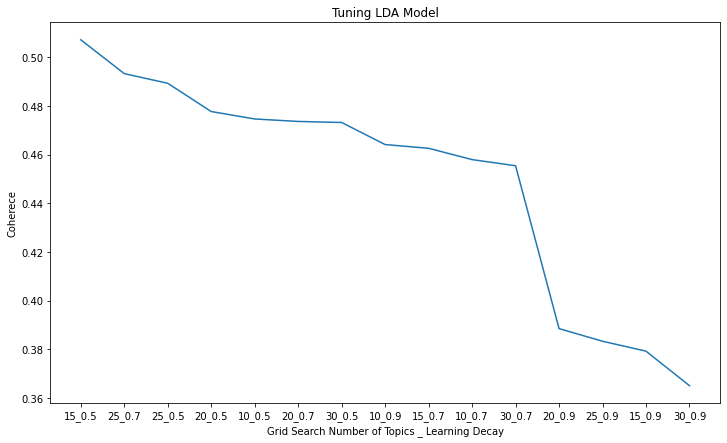

In [ ]:
plt.figure(figsize=(12,7))
plt.plot(ls_params, all_coherence)
plt.xlabel('Grid Search Number of Topics _ Learning Decay')
plt.ylabel('Coherece')
plt.title('Tuning LDA Model');

**The best model has `num_topics` of `15` and a `decay` value of `0.5`.** This model has an improved coherence score over the `base model`

## Best LDA Model Evaluation

### pyLDAvis

In [ ]:

# best_lda_model_file = f'lda_{avg_coherence[0][0]}.gensim'
# best_lda_model = LdaMulticore.load(os.path.join(models_dir, best_lda_model_file))

In [ ]:
#Creating Topic Distance Visualization for the Best LDA model after tuning hyperparameters
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(best_lda_model, corpus, id2word)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:247: FutureWarning:

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only



PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0     -0.225156 -0.016427       1        1  22.263114
1     -0.190275 -0.121609       2        1  15.298766
2     -0.164629  0.121164       3        1  12.658920
3     -0.131451  0.096154       4        1  11.705329
10    -0.098045 -0.226463       5        1   5.341385
4     -0.108509  0.176906       6        1   5.141074
5     -0.006061 -0.067405       7        1   4.281314
13    -0.012474  0.180032       8        1   4.244880
6     -0.019706 -0.219185       9        1   3.900727
14     0.059058  0.002016      10        1   3.597287
7      0.077488  0.124799      11        1   3.353335
8      0.142971 -0.003327      12        1   2.749881
11     0.233849  0.091933      13        1   2.054078
9      0.222669 -0.010754      14        1   1.926442
12     0.220273 -0.127834      15        1   1.483467, topic_info=          Term          Freq         Total Category  logprob  loglift
108      happy  15165.000000  15165.000000  Default  30.0000  30.0000
1328      case  10587.000000  10587.000000  Default  29.0000  29.0000
317      thank  18343.000000  18343.000000  Default  28.0000  28.0000
68        wish   9224.000000   9224.000000  Default  27.0000  27.0000
134   minister   8868.000000   8868.000000  Default  26.0000  26.0000
...        ...           ...           ...      ...      ...      ...
341    embrace    270.734025    347.763834  Topic15  -5.4556   3.9604
2452     smart    409.975931   1024.141774  Topic15  -5.0406   3.2953
1491      mean    439.337909   3168.603057  Topic15  -4.9715   2.2350
34        know    307.106982   3040.483015  Topic15  -5.3295   1.9182
433    history    286.663538   2653.368671  Topic15  -5.3984   1.9855

[984 rows x 6 columns], token_table=       Topic      Freq    Term
term                          
1935       9  0.994574     aaj
3946       4  0.998768  accuse
1012       1  0.302697     act
1012       2  0.073937     act
1012       3  0.081164     act
...      ...       ...     ...
503       15  0.001686    year
3996       9  0.998210     yeh
5216      12  0.997097  yellow
2891       6  0.994434  yojana
11809      2  0.996693     zee

[3070 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[1, 2, 3, 4, 11, 5, 6, 14, 7, 15, 8, 9, 12, 10, 13])

**Overall the intertopic distance map shows good seperation between the topics as represented by the circles. 
`Topic 1` has words such as `help`, `let`, `family`, `come`, `fight`, `way` which seems to be discussion around asking for help, fighting covid etc
`Topic 2` talks about `thank`, `team`, `good`, `film`, `look`, `come` which seems to be promotional activity around a release of a film
`Topic 3` has words such as `new`, `flight`, `business`, `city`, `development`, `market`, `company` which do not seem to be rleated to any one particular topic.`Topic 4` talks about `bjp`, `party`, `justice`, `congress`, `police`, `case` which seem to be political discussions
`Topic 5` talks about `happy`, `wish`, `god`, `book`, `bless` which seem to be about general wishes
`Topic 6` talks about `crore`, `vaccine`, `lakh`, `student`, `read` which seem to be about vaccination drive

Overall there is a good coherence of topics being identified based on human interpretation. But intutively speaking since the tweets cover the 2 year period, it is conceivable to imagine that there are more than 15 topics being talked about in this time period. 

### Topics Evaluation

In [ ]:
# Filtering for words 
words = [re.findall(r'"([^"]*)"',t[1]) for t in best_lda_model.show_topics(num_topics=20)]

In [ ]:
# Create Topics
topics = [' '.join(t[0:20]) for t in words]

In [ ]:
# Getting the topics
for id, t in enumerate(topics, 0): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")

------ Topic 0 ------
help let family come fight way go right want think

------ Topic 1 ------
thank team good film look come new win release congratulation

------ Topic 2 ------
new flight business city development market company price global country

------ Topic 3 ------
bjp party justice police congress case leader bapu sant asharamji

------ Topic 4 ------
crore vaccine lakh student read school bank open free vaccination

------ Topic 5 ------
look kashmir boy jammu old hyderabad picture beautiful home shoot

------ Topic 6 ------
song temple hai music listen ram beautiful video king art

------ Topic 7 ------
food help blood army eat distribute donate camp needy singh

------ Topic 8 ------
morning road west bengal pic south north fly east black

------ Topic 9 ------
block pakistan dist river earth sri chandigarh meet forest network

------ Topic 10 ------
happy wish god book bless sant bapu asharamji health happiness

------ Topic 11 ------
post mumbai photo police pradesh ta

**Most Common Words and Their Count in the Corpus**<br>
This was used to create a custom stopword list based on most recurring words in the corpus




In [ ]:
topics_tolist = df_swach['spacy_lemma_tokens'].tolist()
topics_toflatlist1 = [item for sublist in topics_tolist for item in sublist]
topics_toflatlist2 = [item for sublist in topics_toflatlist1 for item in sublist]

In [ ]:
topics_word_counter = Counter(topics_toflatlist1)
topics_word_counter.most_common(30)

[('thank', 20467),
 ('happy', 17539),
 ('new', 16480),
 ('come', 14389),
 ('good', 11998),
 ('say', 11263),
 ('go', 11007),
 ('look', 10937),
 ('case', 10664),
 ('wish', 10632),
 ('get', 10388),
 ('team', 10295),
 ('help', 10235),
 ('let', 10227),
 ('take', 10073),
 ('minister', 9421),
 ('year', 9320),
 ('family', 9180),
 ('support', 8943),
 ('live', 8820),
 ('country', 8514),
 ('way', 8487),
 ('bjp', 8321),
 ('give', 8307),
 ('big', 8113),
 ('home', 8094),
 ('want', 7984),
 ('right', 7871),
 ('start', 7867),
 ('woman', 7590)]

In [ ]:
[word for (word, _) in topics_word_counter.most_common(30)]

['india',
 'day',
 'good',
 'today',
 'time',
 'people',
 'thank',
 'year',
 'happy',
 'new',
 'wish',
 'life',
 'love',
 'come',
 'work',
 'shri',
 'need',
 'delhi',
 'indian',
 'birthday',
 'know',
 'world',
 'great',
 'state',
 'say',
 'govt',
 'go',
 'look',
 'covid',
 'watch']

The following section talks about topic, word and sentence distributions for the `best lda model`. The code for these visualization has been adapted from this [tutorial](https://www.machinelearningplus.com/nlp/topic-modeling-visualization-how-to-present-results-lda-models/).

### Dominant Topic Distribution

The LDA will model multiple topics in each document. But we are generally interested in assigning one particular topic to each tweet since that is the most likely scenario, a tweet talks about one particular topic. This is done by extracting all the topics and their associated weights for a given document, sorting them by the weights in descending order and outputting the words constituting that particular topic.

In [ ]:


def format_topics_sentences(ldamodel, corpus, texts):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in tqdm(enumerate(ldamodel[corpus]), total=len(ldamodel[corpus])):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=best_lda_model, corpus=corpus, texts=id_wordszz)

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']
df_dominant_topic.head(10)

100%|██████████| 408462/408462 [1:36:15<00:00, 70.72it/s]


,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,10.0,0.4437,"happy, wish, god, book, bless, sant, bapu, asharamji, health, happiness","[bhai, celebrate, generation, house, lal, phonta, pishi, ray, roma]"
1,1,1.0,0.5443,"thank, team, good, film, look, come, new, win, release, congratulation","[accept, available, challenge, delighted, difficult, game, goal, hyderabad, improve, lot, new, p..."
2,2,5.0,0.6888,"look, kashmir, boy, jammu, old, hyderabad, picture, beautiful, home, shoot","[artist, old]"
3,3,1.0,0.5821,"thank, team, good, film, look, come, new, win, release, congratulation","[career, crazy, enjoy, grill, guy, hey, include, interview, know, link, listen, playlist, podcas..."
4,4,0.0,0.4315,"help, let, family, come, fight, way, go, right, want, think","[clear, course, imagine, lose, seat, tories, want, win]"
5,5,1.0,0.3727,"thank, team, good, film, look, come, new, win, release, congratulation","[bangladesh, confirm, eden, gardens, go, test, well]"
6,6,10.0,0.7583,"happy, wish, god, book, bless, sant, bapu, asharamji, health, happiness","[celebrate, blood, bond, brother, cousin, festival, good, miss, sister, special, time, unique, w..."
7,7,0.0,0.9348,"help, let, family, come, fight, way, go, right, want, think","[avoid, break, ego, forgive, laugh, live, loudly, make, quickly, short, smile, truly]"
8,8,4.0,0.4382,"crore, vaccine, lakh, student, read, school, bank, open, free, vaccination","[good, wish, class, kharagpur, sketch, student]"
9,9,3.0,0.4741,"bjp, party, justice, police, congress, case, leader, bapu, sant, asharamji","[agitate, bengal, decent, delegation, demand, governer, job, lead, leader, long, marginalized, m..."


In [ ]:
dominant_file = 'dominant_topic.csv'
df_dominant_topic.to_csv(os.path.join(csv_dir, dominant_file))

In [ ]:
df_dominant_topic = pd.read_csv(os.path.join(csv_dir, dominant_file), index_col='Unnamed: 0')


### Most Representative Sentence for Each Topic

Since each document is assigned multiple topics with a particular weight, it is helpful to know what is underlying representative text that drives the mixture of words of a particular topic

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100
df_topic_sents_keywords= df_dominant_topic.drop(columns = 'Document_No')
sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Topic_Perc_Contrib'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.9718,"help, let, family, come, fight, way, go, right, want, think","[break, spread, abuse, important, matter, power, inspire, true, word, type, use, voice, medium, ..."
1,1.0,0.9749,"thank, team, good, film, look, come, new, win, release, congratulation","[super, movie, hit, sir, kannada]"
2,2.0,0.9719,"new, flight, business, city, development, market, company, price, global, country","[good, lead, generate, market, open, huge, diversity, reflect, global, trade, produce, possible,..."
3,3.0,0.9705,"bjp, party, justice, police, congress, case, leader, bapu, sant, asharamji","[minister, get, prasad, fake, actor, innocent, case, bail, journalist, puri, judiciary, deepak, ..."
4,4.0,0.9598,"crore, vaccine, lakh, student, read, school, bank, open, free, vaccination","[new, lead, government, board, year, tackle, end, half, crore, previous, illegal, worth, delay, ..."
5,5.0,0.9611,"look, kashmir, boy, jammu, old, hyderabad, picture, beautiful, home, shoot","[team, head, khan, assist, makeup, makeover, turner, accessory, kaur, rishika, bijan, chitaliya,..."
6,6.0,0.9651,"song, temple, hai, music, listen, ram, beautiful, video, king, art","[house, miss, thing, talk, say, enter, hai, hug, sorry, task, bhi, karegi, nehi, bohot, kaha, pr..."
7,7.0,0.9650,"food, help, blood, army, eat, distribute, donate, camp, needy, singh","[good, event, help, city, start, essential, hold, basis, poor, road, times, supply, corporation,..."
8,8.0,0.9547,"morning, road, west, bengal, pic, south, north, fly, east, black","[load, tweet, smash]"
9,9.0,0.9647,"block, pakistan, dist, river, earth, sri, chandigarh, meet, forest, network","[earth, block, source, lightning, alert, network, dangerous, dist, thunderstorm, bolangir, boudh..."


### Frequency Distribution of Word Counts in Documents

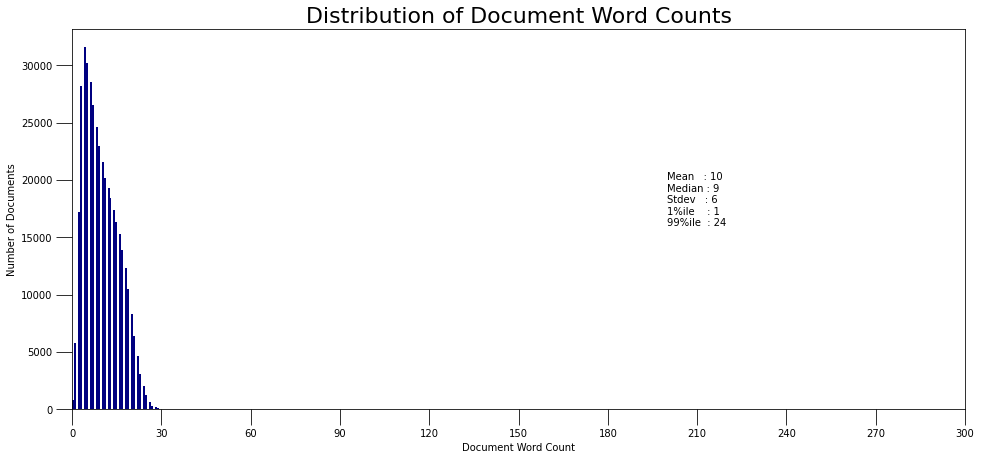

In [ ]:

doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(16,7))#, dpi=160)
plt.hist(doc_lens, bins = 50, color='navy')
plt.text(200, 20000, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(200, 19000, "Median : " + str(round(np.median(doc_lens))))
plt.text(200, 18000, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(200, 17000, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(200, 16000, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 300), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,300,11))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()

We see that the number of word counts in the documents is very small. This is due to the fact that most of the recurring words were added to the stopwords list which did not really add context to the topic

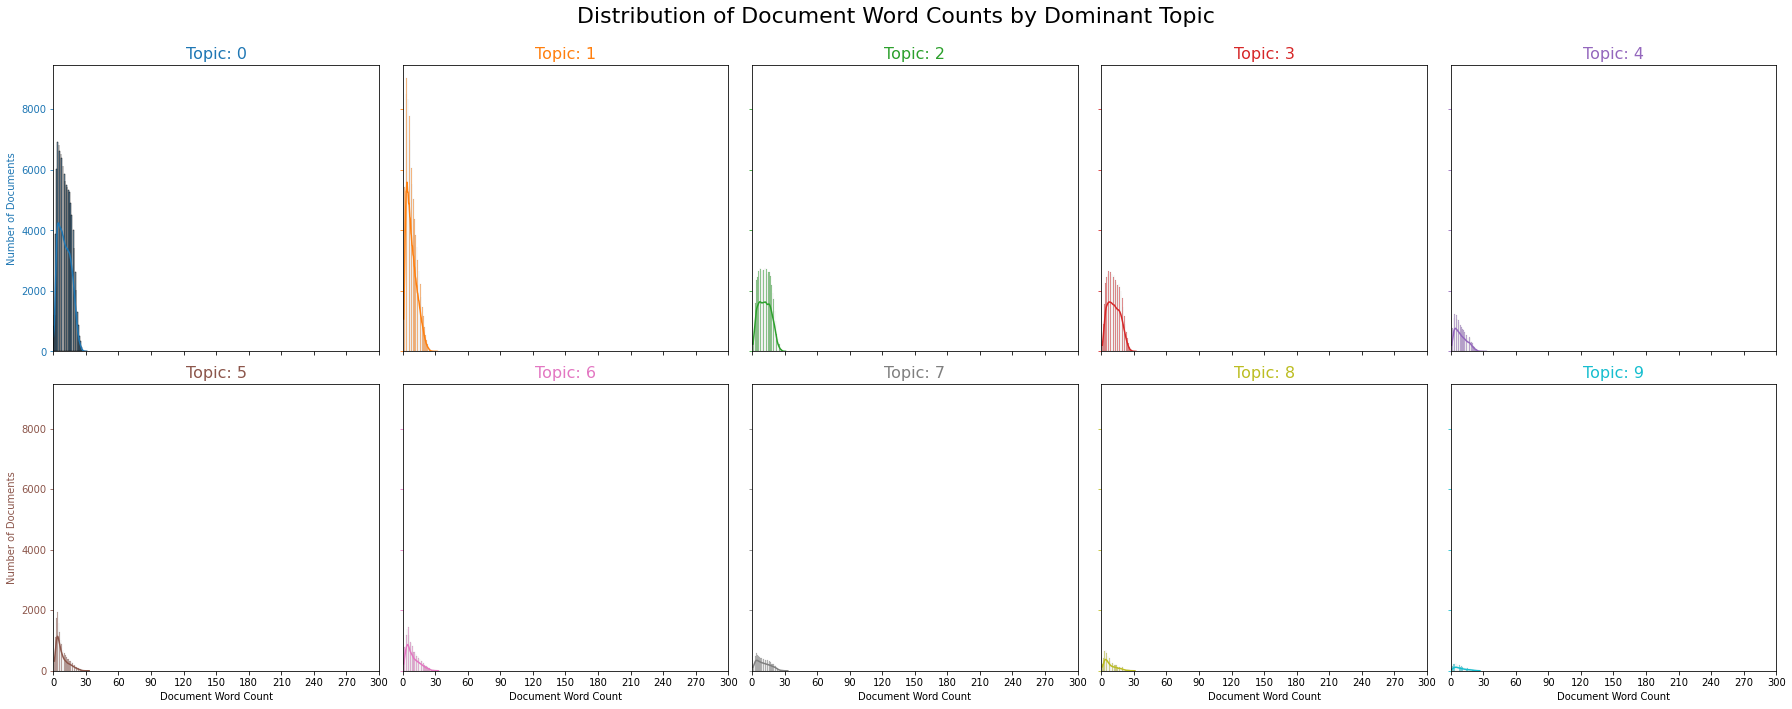

In [ ]:

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

fig, axes = plt.subplots(2,5,figsize=(25,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):    
    df_dominant_topic_sub = df_dominant_topic.loc[df_dominant_topic.Dominant_Topic == i, :]
    doc_lens = [len(d) for d in df_dominant_topic_sub.Text]
    sns.histplot(doc_lens, bins = 50, color=cols[i], kde=True, ax = ax)
    ax.tick_params(axis='y', labelcolor=cols[i], color=cols[i])
    # sns.kdeplot(doc_lens, color="black", shade=False, ax=ax.twinx())
    ax.set(xlim=(0, 300), xlabel='Document Word Count')
    ax.set_ylabel('Number of Documents', color=cols[i])
    ax.set_title('Topic: '+str(i), fontdict=dict(size=16, color=cols[i]))

fig.tight_layout()
fig.subplots_adjust(top=0.90)
plt.xticks(np.linspace(0,300,11))
fig.suptitle('Distribution of Document Word Counts by Dominant Topic', fontsize=22)
plt.show()

Word count distribution is similar amongst all topics. `Topic 0` to `Topic 3` constitute the bulk of documents

### Word Clouds of Top Keywords in Each Topic

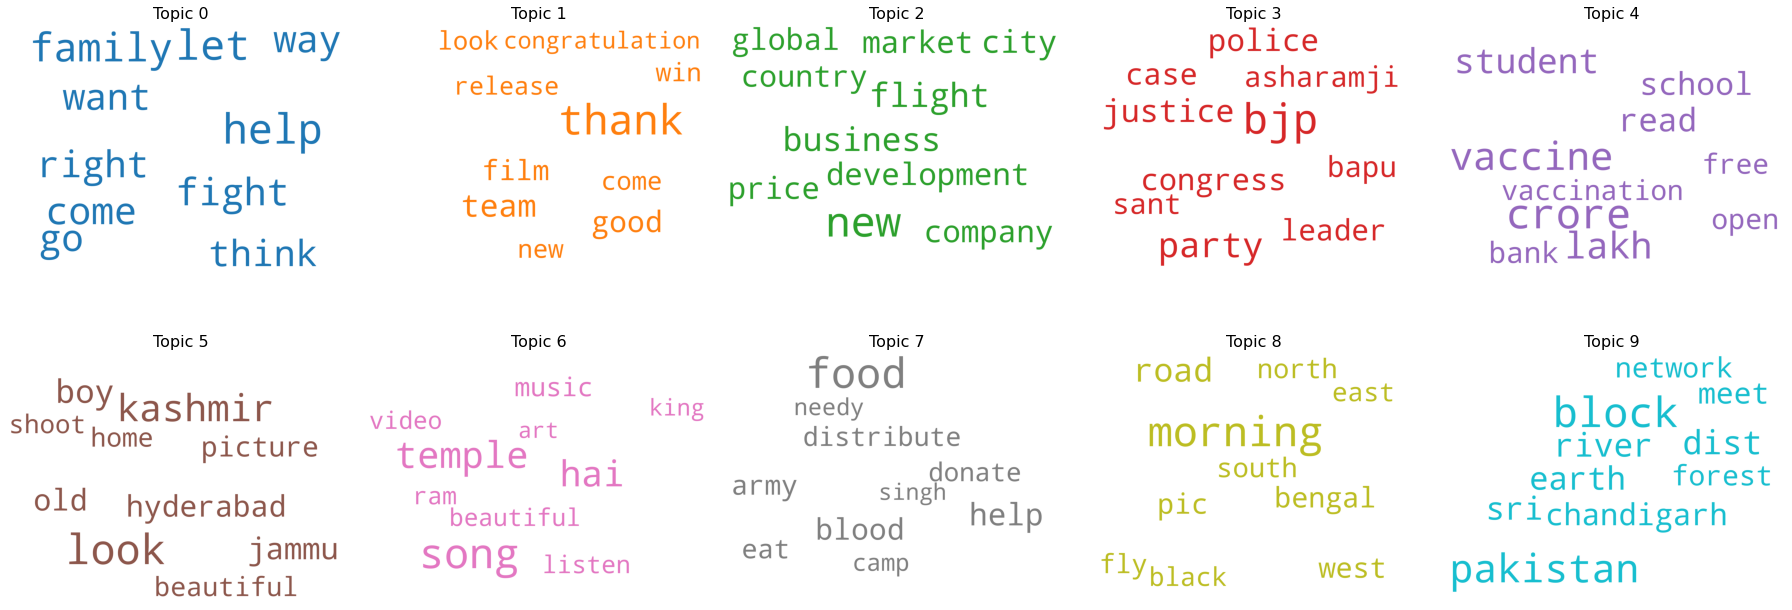

In [ ]:

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords_set,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = best_lda_model.show_topics(formatted=False, num_topics=20)

fig, axes = plt.subplots(2,5,figsize=(25,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Wordcloud shows the words and their relative percentage within a given topic. This helps us to understand which words contribute to a given topic

### Word Counts of Topic Keywords

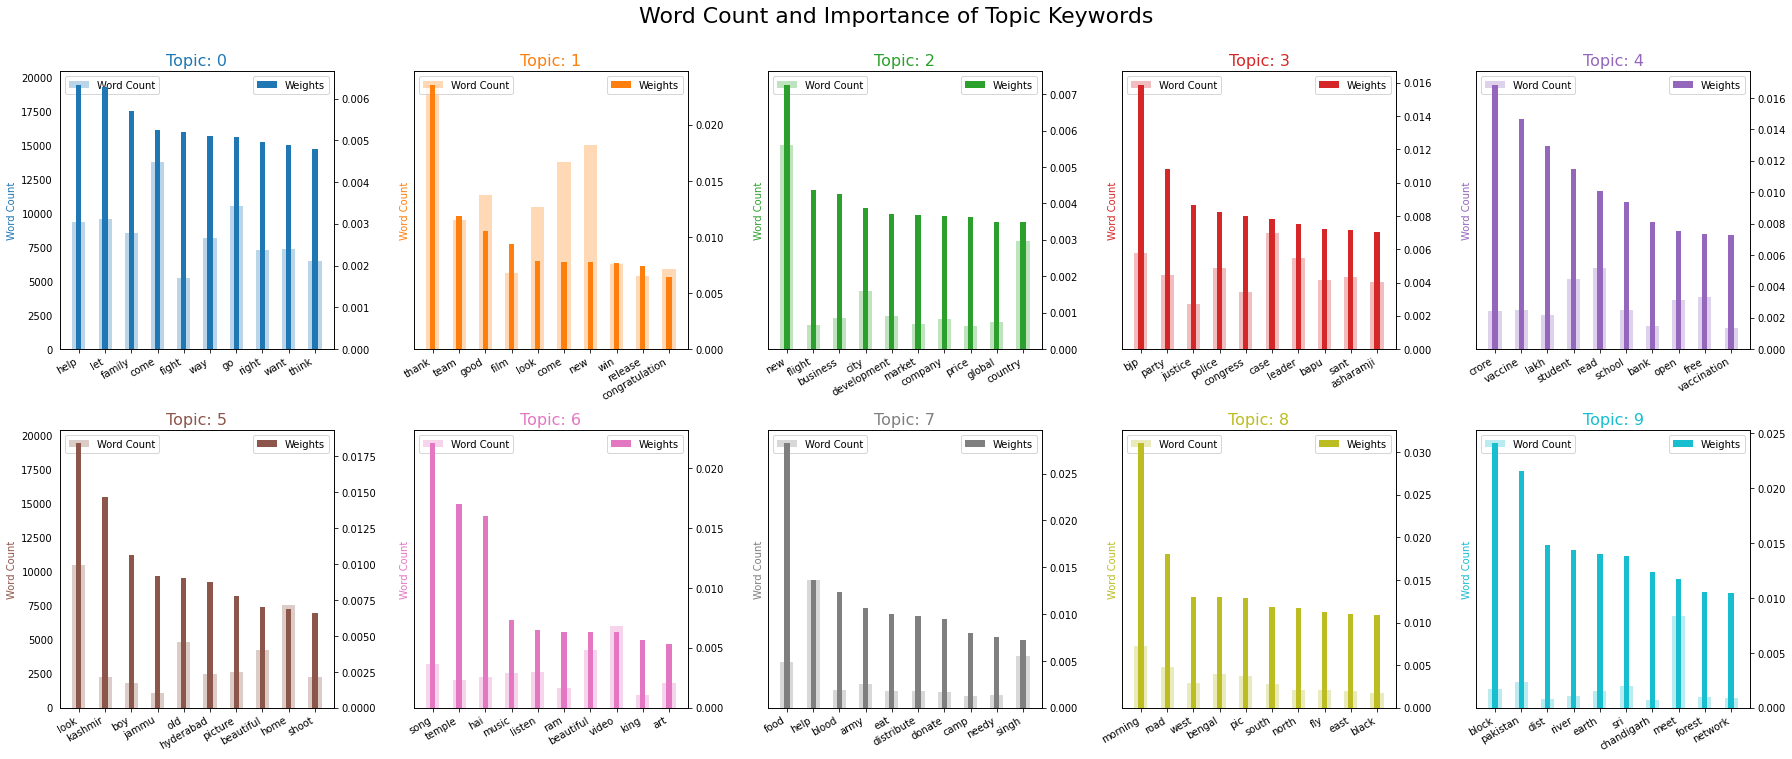

In [ ]:

from collections import Counter
topics = best_lda_model.show_topics(formatted=False, num_topics=20)
data_flat = [w for w_list in id_wordszz for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2,5,figsize=(25,10), sharey=True)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    # ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 50000)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

This plot is similar to wordcloud with the actual word counts and its correspoind weight distribution

### Sentench Chart Colored by Topic

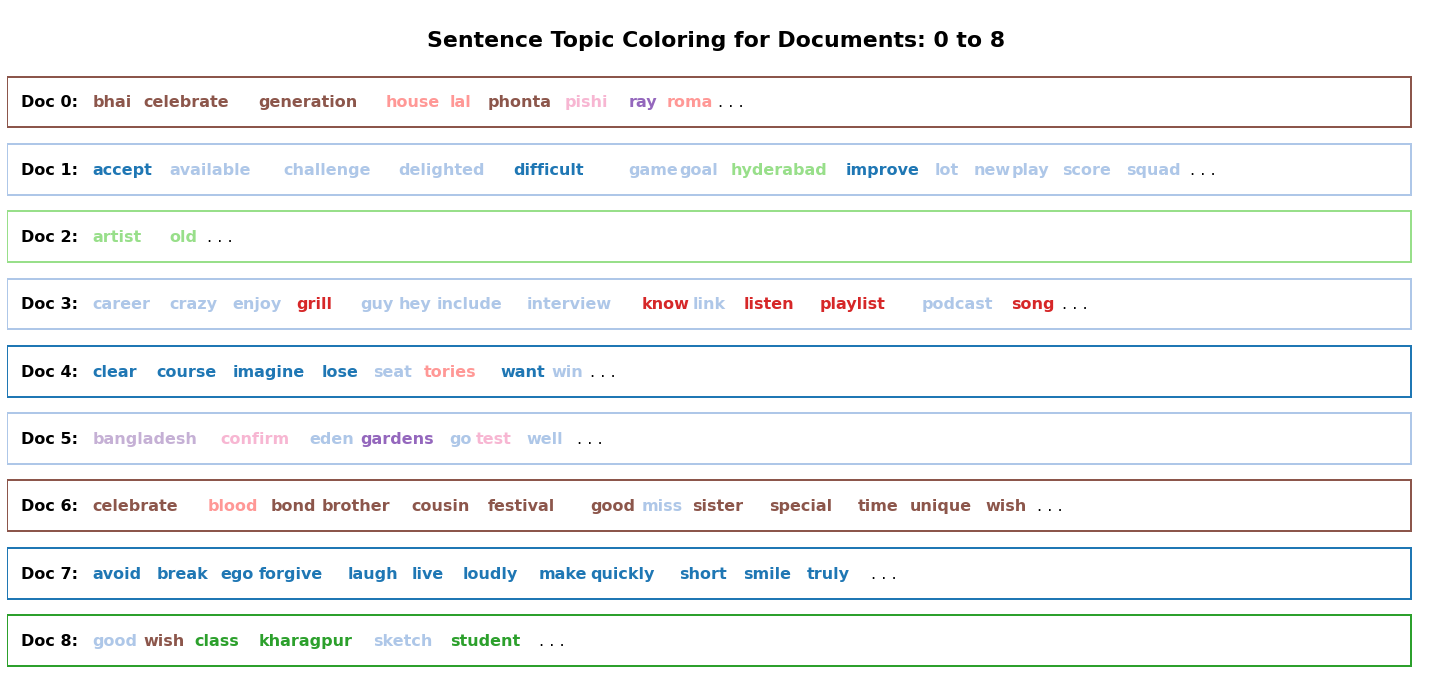

In [ ]:


# Sentence Coloring of N Sentences
from matplotlib.patches import Rectangle

def sentences_chart(lda_model=best_lda_model, corpus=corpus, start = 0, end = 10):
    corp = corpus[start:end]
    tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
    # Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
    for i in range(len(tableau20)):    
        r, g, b = tableau20[i]    
        tableau20[i] = (r / 255., g / 255., b / 255.) 
    mycolors = np.array([color for color in tableau20])

    fig, axes = plt.subplots(end-start, 1, figsize=(20, (end-start)*0.95))       
    axes[0].axis('off')
    for i, ax in enumerate(axes):
        if i > 0:
            corp_cur = corp[i-1] 
            topic_percs, wordid_topics, wordid_phivalues = lda_model[corp_cur]
            word_dominanttopic = [(lda_model.id2word[wd], topic[0]) for wd, topic in wordid_topics]    
            ax.text(0.01, 0.5, "Doc " + str(i-1) + ": ", verticalalignment='center',
                    fontsize=16, color='black', transform=ax.transAxes, fontweight=700)

            # Draw Rectange
            topic_percs_sorted = sorted(topic_percs, key=lambda x: (x[1]), reverse=True)
            ax.add_patch(Rectangle((0.0, 0.05), 0.99, 0.90, fill=None, alpha=1, 
                                   color=mycolors[topic_percs_sorted[0][0]], linewidth=2))

            word_pos = 0.06
            for j, (word, topics) in enumerate(word_dominanttopic):
                if j < 14:
                    ax.text(word_pos, 0.5, word,
                            horizontalalignment='left',
                            verticalalignment='center',
                            fontsize=16, color=mycolors[topics],
                            transform=ax.transAxes, fontweight=700)
                    word_pos += .009 * len(word)  # to move the word for the next iter
                    ax.axis('off')
            ax.text(word_pos, 0.5, '. . .',
                    horizontalalignment='left',
                    verticalalignment='center',
                    fontsize=16, color='black',
                    transform=ax.transAxes)       

    plt.subplots_adjust(wspace=0, hspace=0)
    plt.suptitle('Sentence Topic Coloring for Documents: ' + str(start) + ' to ' + str(end-2), fontsize=22, y=0.95, fontweight=700)
    plt.tight_layout()
    plt.show()

sentences_chart() 

Each sentence is assigned different topics with different probabilities. and words occuring in these senctences could thus be associated with different topics. The above plot shows the topic associated with a given document and words associated with the corresponding topics

### Most Discussed Topics

100%|██████████| 408461/408461 [11:25<00:00, 596.06it/s]


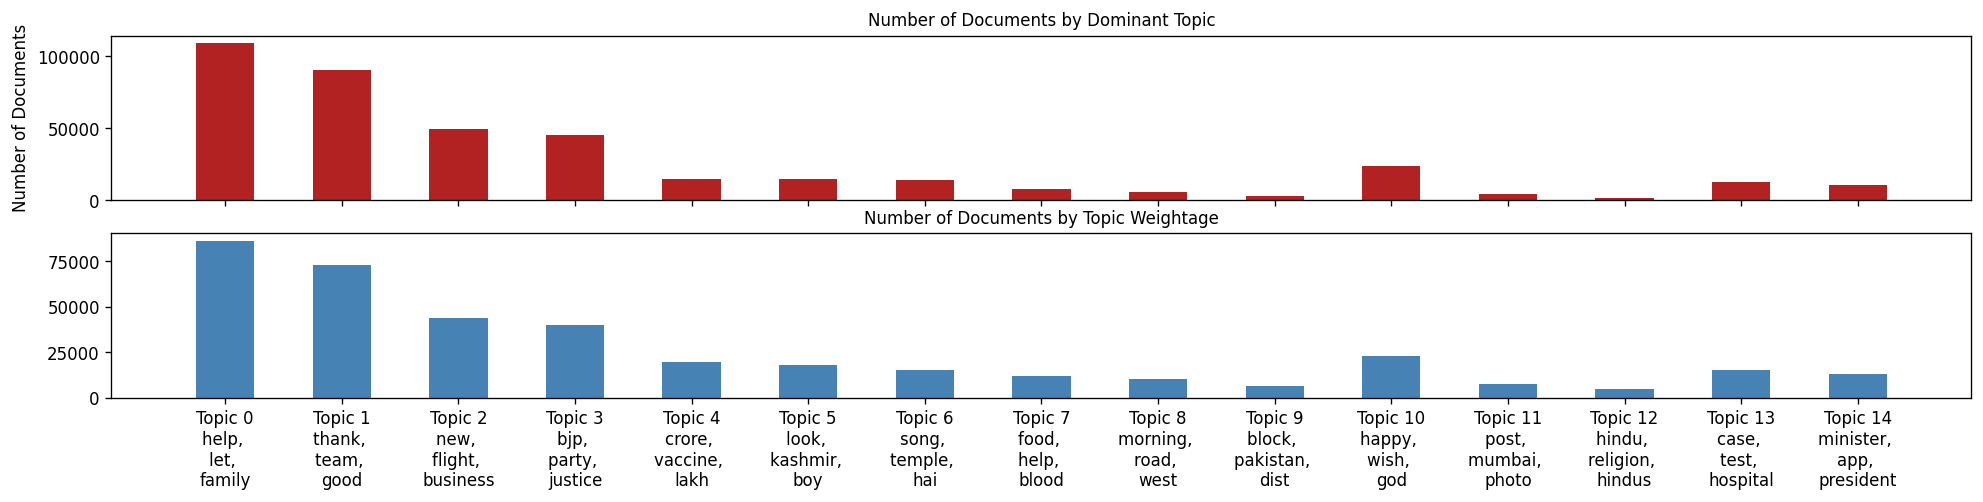

In [ ]:
# What are the most discussed topics in the documents?

# Sentence Coloring of N Sentences
from tqdm import tqdm

def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in tqdm(enumerate(corpus_sel), total=len(corpus_sel)):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=best_lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()
file = 'df_dominant_topic_in_each_doc.csv'
df_dominant_topic_in_each_doc.to_csv(os.path.join(csv_dir, file))

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()
file = 'df_topic_weightage_by_doc.csv'
df_topic_weightage_by_doc.to_csv(os.path.join(csv_dir, file))

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in best_lda_model.show_topics(formatted=False, num_topics=20) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)
file = 'df_top3words.csv'
df_top3words.to_csv(os.path.join(csv_dir, file))

# Let’s make two plots:

# The number of documents for each topic by assigning the document to the topic that has the most weight in that document.
# The number of documents for each topic by by summing up the actual weight contribution of each topic to respective documents.

from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 4), dpi=120, sharex=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
# ax1.set_ylim(0, 1000)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

We see that `topic 0` to `topic 3` are the most dominant of the topics being talked about in the tweets

### t-SNE Clustering Chart

In [ ]:
# t-SNE Clustering Chart
# Let’s visualize the clusters of documents in a 2D space using t-SNE (t-distributed stochastic neighbor embedding) algorithm.

# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
# topic_weights = []
# for i, row_list in tqdm(enumerate(best_lda_model[corpus]), total = len(corpus)):
#     topic_weights.append([w for i, w in row_list[0]])

# n-1 rows each is a vector with i-1 posisitons, where n the number of documents 
# i the topic number and tmp[i] = probability of topic i
topic_weights = []
for row_list in tqdm(best_lda_model[corpus], total = len(best_lda_model[corpus])):
  print(row_list)
  tmp = np.zeros(num_topics)
  for i, w,_ in row_list: 
    tmp[i] = w
    topic_weights.append(tmp)

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values
file = 'arr_tSNE.txt'
np.savetxt(os.path.join(csv_dir,file), arr)

arr = np.loadtxt(os.path.join(csv_dir,file))

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]


# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 20
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
# Scale the RGB values to the [0, 1] range, which is the format matplotlib accepts.    
for i in range(len(tableau20)):    
    r, g, b = tableau20[i]    
    tableau20[i] = (r / 255., g / 255., b / 255.) 
mycolors = np.array([color for color in tableau20])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

# GSDMM

As discussed earlier, LDA models do not work very well with short texts such as tweets. LDA models identifies multiple topics in a given document. However, short texts such as tweets are usually focussed on a single topic. GSDMM models works on the premise that one topic in one document.
To evaluate the performance of GSDMM, a single model was fitted to our corpus. This model takes 6 hours to run for 50 iterations on Google Colab. Hence, even though this model reveals much more coherent topics than the LDA model, it could not be more extensively used as the LDA model due to its slow run time.
This section describes the basic setup and evaluation of a GSDMM model using the Movie Group Process.
**Model Setup**
- GSDMM requires the total vocabulary length and list of tokens as the primary input. We also have to provide the upper count of clusters for our courpus. Additional hyperparameters `alpha` and `beta` can be provided to fine tune the topic coherence. GSDMM models are thought to converge much faster and as such do not require lot of iterations.


## Base Model

In [ ]:
# importing libraries
from gsdmm import MovieGroupProcess



# create variable containing length of dictionary/vocab
vocab_length = len(id2word)


# initialize GSDMM
gsdmm = MovieGroupProcess(K=50, alpha=0.1, beta=0.1, n_iters=30)

# fit GSDMM model
y = tqdm(gsdmm.fit(df_swach['spacy_lemma_tokens'].to_numpy(), vocab_length))

In stage 0: transferred 384953 clusters with 50 clusters populated
In stage 1: transferred 302609 clusters with 50 clusters populated
In stage 2: transferred 189146 clusters with 50 clusters populated
In stage 3: transferred 140578 clusters with 50 clusters populated
In stage 4: transferred 120457 clusters with 50 clusters populated
In stage 5: transferred 110220 clusters with 50 clusters populated
In stage 6: transferred 103948 clusters with 50 clusters populated
In stage 7: transferred 100579 clusters with 50 clusters populated
In stage 8: transferred 98501 clusters with 50 clusters populated
In stage 9: transferred 97176 clusters with 50 clusters populated
In stage 10: transferred 95572 clusters with 50 clusters populated
In stage 11: transferred 94177 clusters with 50 clusters populated
In stage 12: transferred 93872 clusters with 50 clusters populated
In stage 13: transferred 93805 clusters with 50 clusters populated
In stage 14: transferred 93721 clusters with 50 clusters populat

  0%|          | 0/408462 [00:00<?, ?it/s]

In [ ]:
# from gsdmm import MovieGroupProcess
# Save model
import pickle
file = 'gsdmm_v2.model'
with open(os.path.join(models_dir, file), 'wb') as f:
 pickle.dump(gsdmm, f)
 f.close()

## Evaluation

In [ ]:
import pickle
from gsdmm import MovieGroupProcess

In [ ]:
file = 'gsdmm_v2.model'
gsdmm = pickle.load(open(os.path.join(models_dir, file), 'rb'))
# gsdmm.cluster_doc_count

In [ ]:
gsdmm.cluster_doc_count

In [ ]:
# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-20:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(gsdmm.cluster_word_distribution, top_index, 20)

Number of documents per topic : [17316 21841 10876   585  9731  7278 20636  1966  9391   178  9095 12625
  1120  5273   359 14173   220 11476  6121   225  5537  4258   419  6916
 21640  7174 19423  8593 34603  6173 13828   256 16923  3615  2465   465
  8590 13724  5679 14035  3819  2983   250   191 13015   545  7950   873
  6731 17304]
Most important clusters (by number of docs inside): [28  1 24  6 26  0 49 32 15 39 30 37 44 11 17  2  4  8 10 27]

Cluster 28 : [('go', 1996), ('thing', 1878), ('think', 1860), ('come', 1792), ('feel', 1674), ('look', 1659), ('get', 1518), ('want', 1510), ('happy', 1388), ('way', 1377), ('let', 1343), ('thank', 1276), ('new', 1118), ('friend', 1090), ('year', 1081), ('man', 1074), ('good', 1051), ('heart', 1031), ('hope', 1030), ('home', 1015)]

Cluster 1 : [('medium', 1915), ('news', 1646), ('tweet', 1208), ('twitter', 1104), ('say', 1026), ('social', 874), ('fake', 862), ('bjp', 824), ('get', 783), ('think', 775), ('right', 737), ('journalist', 734), (

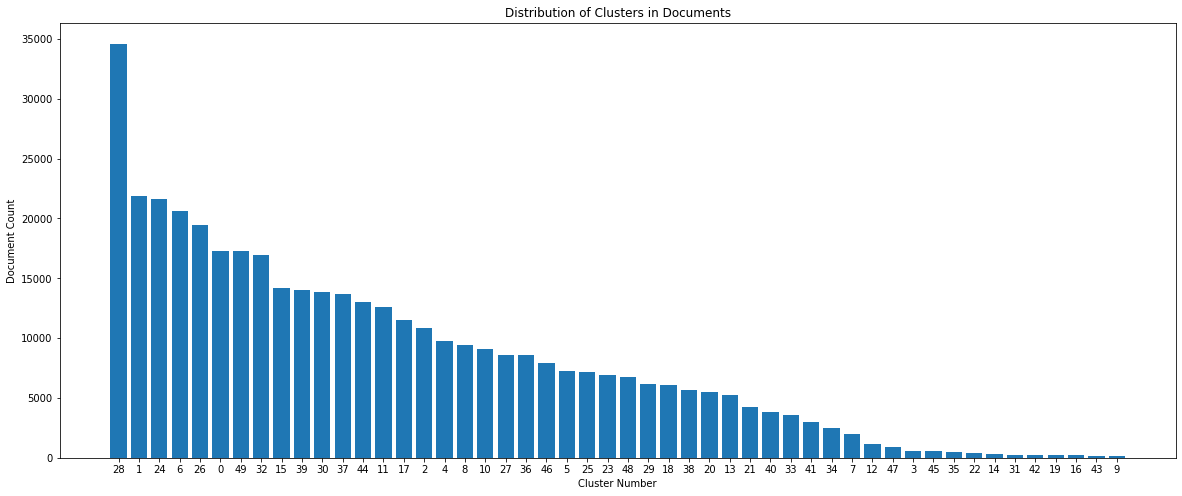

In [ ]:
dict_doc_count = dict(zip(range(len(doc_count)), doc_count))
dict_doc_count= (sorted(dict_doc_count.items(), key=lambda x: x[1], reverse=True))
x_val = [str(x[0]) for x in dict_doc_count]
y_val = [x[1] for x in dict_doc_count]

fig, ax = plt.subplots(figsize=(20,8))
ax.bar(x_val, y_val)
ax.set_xlabel('Cluster Number')
ax.set_ylabel('Document Count')
ax.set_title('Distribution of Clusters in Documents');

The input number of clusters was 50 and the model ended up assigning our corpus to all the 50 clusters with 30 iterations. But the document count of ~15 clusters is very low. Probably with more iterations the model would have assigned fewer than 50 clusters to our corpus. The cluster-28 is most dominant cluster with almost 35,000 documents from the corpus.

In [ ]:
# Get topic word distributions from gsdmm model
cluster_word_distribution = gsdmm.cluster_word_distribution

# Select topic you want to output as dictionary (using topic_number)
fig, axes = plt.subplots(4,5,figsize=(25,15), sharex=True, sharey=True, dpi=150)

tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

values = 20 # top 25 words
cloud = WordCloud(stopwords=stopwords_set,
                  background_color='#fcf2ed',
                  width=2500,
                  height=1800,
                  max_words=values,
                  # colormap='tab20',
                  color_func=lambda *args, **kwargs: tableau20[i],
                  prefer_horizontal=1.0)

for i, ax in enumerate(axes.flatten()):
  fig.add_subplot(ax)
  topic_dict = sorted(cluster_word_distribution[top_index[i]].items(), key=lambda k: k[1], reverse=True)[:values] 
  cloud.generate_from_frequencies(dict(topic_dict), max_font_size=300)
  plt.gca().imshow(cloud)
  plt.gca().set_title(f'Cluster-{top_index[i]}', fontdict=dict(size=16))
  plt.gca().axis('off')

# Print to screen
# plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()



Output hidden; open in https://colab.research.google.com to view.

The wordcloud shows the word cloud for the top 20 clusters. Here I attempt to assign a topic to each of these 20 clusters to see how distinct they are from each other. The clusters are ranked high to low based on the number of documents assigned to that cluster
- Cluster 28: Wishing the best
- Cluster 1: Social Media and Fake News
- Cluster 24 : Birthday wishes and congratulations
- Cluster 6: Invitations to join live stream
- Cluster 26: Religion based Politics discussion
- Cluster 0: Cricket and sports
- Cluster 49: Covid messages specifically wishing well
- Cluster 32: Woman, education and students
- Cluster 15: Covid affecting students due to lockdown
- Cluster 39: Bengal Elections and two national parties
- Cluster 30: Stocks and companies
- Cluster 37: Film promotions
- Cluster 44: Audience review
- Cluster 11: Covid lockdown and case fatalities
- Cluster 17: Ruling party
- Cluster 2: Visiting places
- Cluster 4: Law enforcement
- Cluster 8: Public protests
- Cluster 9: Covid deaths and condolences
- Cluster 27: Anniversary and possibly about Indian independence day

In [ ]:

# define function to get words in topics
def get_topics_lists(model, top_clusters, n_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    n_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:n_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics

# get topics to feed to coherence model
topics = get_topics_lists(gsdmm, top_index, 20) 

# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=id2word, 
                          corpus=corpus, 
                          texts=id_wordszz, 
                          coherence='c_v')

# get coherence value
coherence_gsdmm = cm_gsdmm.get_coherence()  

print(coherence_gsdmm)

0.4893324739130209


The base model for GSDMM has a better coherence score than the base LDA model

# Modeling Trending Topics

Up until now, Topic modeling was done on the entire corpus which consists of all the tweets over a 2 year time period and these tweets were clustered with 5-50 topics. However, with social media different topics trend at different times. Conversations constantly evolve on a daily, weekly, monthly basis. Topics which were relevant at one time and were being talked and discussed about may not stay relevant later in time. Hence, using the entire corpus to fit a certain number of topics has a limitation. It does not capture evolving trends. Here I try to capture the topics on a monthly basis to evaluate how the conversations have changed over the two year window. The model is fit to an individual month's tweets and the topics for that given month analyzed independently. In essence there is one model for one month. So I have 24 models for the 24 months of data. I use gridsearch on each of these models to find the best topics for a given month. Workflow is as follows:
- Gridsearch using number of topics and decay as hyperparameters and fit the model for a given month of tweets data
- Load the trained models and calculate coherences
- Rank the model on coherences and save the model with highest coherence as bestmodel for that month
- Use that best model to discover topics and associated words to visualize the top topics over the 2 year period

In [ ]:
from ast import literal_eval
from datetime import date, timedelta
from dateutil.relativedelta import relativedelta
import calendar
import glob
from pathlib import Path
import re
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:

swach_file = 'swachtweets_lemma.csv'
df_swach = pd.read_csv(os.path.join(csv_dir, swach_file), index_col='Unnamed: 0', converters={"spacy_lemma_tokens": literal_eval}, parse_dates=['date']) # when reading the csv, spacy_lemma_tokens which is a list was read as a string
df_swach['date'] = df_swach['date'].dt.date

In [ ]:
df_swach.head(2)

,date,content,countryCode,length,swach_content,mentions,hashtags,spacy_lemma_tokens,tokens_back_to_text
0,2019-10-29,Three generations celebrating Bhai Phonta at Lal Pishi's house (Roma Ray). https://t.co/yqisRjKoa5,IN,12,three generations celebrating bhai phonta at lal pishi s house roma ray,[],[],"[generation, celebrate, bhai, phonta, lal, pishi, house, roma, ray]",generation celebrate bhai phonta lal pishi house roma ray
1,2019-10-29,Just delighted to score my 1st goal with new tem hyderabad. We need to improve a lot and is very...,IN,35,just delighted to score my st goal with new tem hyderabad we need to improve a lot and is very d...,[],[],"[delighted, score, goal, new, tem, hyderabad, improve, lot, difficult, play, game, squad, availa...",delighted score goal new tem hyderabad improve lot difficult play game squad available accept ch...


In [ ]:
num_topics_range = range(3,31,3)
decay_range = [.5, .6, .7, .9]

In [ ]:
def topic_models_month(tokens, period, models_dir = models_dir): #tokens = df_swach['spacy_lemma_tokens'], tokenized lemmas
  # Create a id2word dictionary
  id2word = Dictionary(tokens.tolist())
  id2word.filter_extremes(no_below=2, no_above=.99)
  corpus = [id2word.doc2bow(d) for d in tokens]
  id_wordszz = [[id2word[id] for id, count in line] for line in corpus]

  for num_topics in num_topics_range:
    for decay in decay_range:
      print(f'Training LDA for period = {period}, num_topics = {num_topics}, decay = {decay}')
      lda = LdaMulticore(
          corpus, id2word=id2word, num_topics=num_topics, workers=10,
          passes=10, iterations=100, random_state=42, eval_every=None,
          alpha='asymmetric',  # shown to be better than symmetric in most cases
          decay=decay, offset=64,  # best params from Hoffman paper
          per_word_topics=True
      )
      file_key = f'{period}_{num_topics}_{decay}'
      lda_file = f'trendinglda_{file_key}.gensim'
      model_path = os.path.join(models_dir, lda_file)
      lda.save(model_path, separately=False)
      # print(f'Saved Model to {model_path} location')

In [ ]:
def load_trending_models(period):
  trained_models = OrderedDict()  
  for num_topics in num_topics_range:
    for decay in decay_range:
      print(f'Loading LDA model for period = {period}, num_topics = {num_topics}, decay = {decay}')
      file_key = f'{period}_{num_topics}_{decay}'
      lda_file = f'trendinglda_{file_key}.gensim'
      model_path = os.path.join(models_dir, lda_file)
      trained_models[file_key] = LdaMulticore.load(model_path)
  return trained_models

In [ ]:
def print_trending_coherence_rankings(coherences, trained_models, cm):
    avg_coherence = \
        [(num_topics, avg_coherence)
         for num_topics, (_, avg_coherence) in coherences.items()]
    ranked = sorted(avg_coherence, key=lambda tup: tup[1], reverse=True)
    print("Ranked by average '%s' coherence:\n" % cm.coherence)
    for item in ranked:
        print(f'params = {item}')
    best_lda_model = trained_models[ranked[0][0]]
    print(f'Best model has period_topics_decay = {ranked[0][0]}')

    return ranked, best_lda_model


In [ ]:
def calculate_coherences(tokens, trained_models):
  id2word = Dictionary(tokens.tolist())
  id2word.filter_extremes(no_below=2, no_above=.99)
  corpus = [id2word.doc2bow(d) for d in tokens]
  id_wordszz = [[id2word[id] for id, count in line] for line in corpus]

  

  cm = CoherenceModel.for_models(
    models = trained_models.values(), dictionary=id2word, texts=id_wordszz, coherence='c_v')
  
  coherence_estimates = cm.compare_models(trained_models.values())
  coherences = dict(zip(trained_models.keys(), coherence_estimates))

  return coherences, cm
  



In [ ]:
sdate = date(2019,9,1)   # start date
edate = date(2021,9,1)   # end date

dates = pd.date_range(sdate,edate,freq='MS')
dates = dates.date

for mdate in dates:
  trending_topics = OrderedDict()
  mask = (df_swach['date'] >= mdate) & (df_swach['date'] < mdate + relativedelta(months=1))
  tokens = df_swach.loc[mask, 'spacy_lemma_tokens']
  period = f'{mdate.year}-{mdate.month}'
  topic_models_month(tokens, period) # uncomment line this to train the LDA models
  trained_trending_models = load_trending_models(period)
  coherences, cm = calculate_coherences(tokens, trained_trending_models)
  avg_coherence, best_lda_model = print_trending_coherence_rankings(coherences, trained_trending_models, cm)

  # Filtering for words 
  words = [re.findall(r'"([^"]*)"',t[1]) for t in best_lda_model.print_topics()]

  # Create Topics
  topics = [' '.join(t[0:10]) for t in words]

  # Getting the topics
  for id, t in enumerate(topics, 0): 
    print(f"------ Topic {id} ------")
    print(t, end="\n\n")


  best_lda_file = f'best_lda_{period}.gensim'
  model_path = os.path.join(models_dir, best_lda_file)
  best_lda_model.save(model_path, separately=False)

 




Training LDA for period = 2019-9, num_topics = 3, decay = 0.5
Training LDA for period = 2019-9, num_topics = 3, decay = 0.6
Training LDA for period = 2019-9, num_topics = 3, decay = 0.7
Training LDA for period = 2019-9, num_topics = 3, decay = 0.9
Training LDA for period = 2019-9, num_topics = 6, decay = 0.5
Training LDA for period = 2019-9, num_topics = 6, decay = 0.6
Training LDA for period = 2019-9, num_topics = 6, decay = 0.7
Training LDA for period = 2019-9, num_topics = 6, decay = 0.9
Training LDA for period = 2019-9, num_topics = 9, decay = 0.5
Training LDA for period = 2019-9, num_topics = 9, decay = 0.6
Training LDA for period = 2019-9, num_topics = 9, decay = 0.7
Training LDA for period = 2019-9, num_topics = 9, decay = 0.9
Training LDA for period = 2019-9, num_topics = 12, decay = 0.5
Training LDA for period = 2019-9, num_topics = 12, decay = 0.6
Training LDA for period = 2019-9, num_topics = 12, decay = 0.7
Training LDA for period = 2019-9, num_topics = 12, decay = 0.9
Trai

In [ ]:
def best_lda_model_coherence(tokens, best_lda_model):
  id2word = Dictionary(tokens.tolist())
  id2word.filter_extremes(no_below=2, no_above=.99)
  corpus = [id2word.doc2bow(d) for d in tokens]
  id_wordszz = [[id2word[id] for id, count in line] for line in corpus]


  # Compute Coherence Score
  coherence_model = CoherenceModel(model=best_lda_model, dictionary=id2word, texts=id_wordszz, coherence='c_v')
  best_coherence_score = coherence_model.get_coherence()
  return best_coherence_score



In [ ]:
p = Path(models_dir)
best_lda_model_files = [i.stem for i in p.glob('best_lda_*.gensim')]

In [ ]:

model_eval_ls = []

p = Path(models_dir)
best_lda_model_files = [i.stem for i in p.glob('best_lda_*.gensim')]
for best_lda_model_file in best_lda_model_files[:]:
  _, _, year, month = re.split('_|-',best_lda_model_file)
  year = int(year)
  month = int(month)
  print(f'Evaluating Models for the Period = {year}-{month},', end= "")
  best_lda_model = LdaMulticore.load(os.path.join(models_dir, f'{best_lda_model_file}.gensim'))

  # Filtering for words 
  words = [re.findall(r'"([^"]*)"',t[1]) for t in best_lda_model.show_topics(num_topics=30)]

  # Create Topics
  # topics = [' '.join(t[0:10]) for t in words]
  topics = [(t[0:10]) for t in words]
  num_topics = len(topics)
  print(f' Number of Topics = {num_topics},', end = "")
  # Getting the topics
  # for id, t in enumerate(topics, 0): 
  #   print(f"------ Topic {id} ------")
  #   print(t, end="\n\n")
  # day = calendar.monthrange(year, month)[1]
  day = 1
  mdate = date(year, month, day) #models were saved wrongly. for 2019-9 correspond to dates >2019-9-30 and <=2019-10-31
  mask = (df_swach['date'] >= mdate) & (df_swach['date'] < mdate + relativedelta(months=1))
  tokens = df_swach.loc[mask, 'spacy_lemma_tokens']
  
  best_coherence_score = round(best_lda_model_coherence(tokens, best_lda_model),2)
  print(f' Coherence Score = {best_coherence_score},', end ="")
  print(f' Topics = {topics}')

  model_eval_ls.append([date(year, month, day),  best_coherence_score, num_topics, topics]) #while saving models, month is corrected

model_eval_df = pd.DataFrame(data=model_eval_ls, columns=['Period', 'Coherence_Score', 'NumofTopics', 'Topics'])
model_eval_df.set_index('Period', inplace=True)
model_eval_df.sort_index(inplace=True)
model_eval_df

Evaluating Models for the Period = 2021-4, Number of Topics = 3, Coherence Score = 0.49, Topics = [['help', 'oxygen', 'hospital', 'thank', 'case', 'new', 'happy', 'come', 'patient', 'bed'], ['post', 'photo', 'god', 'take', 'bless', 'check', 'april', 'friend', 'catch', 'health'], ['patient', 'hospital', 'contact', 'age', 'blood', 'require', 'requirement', 'plasma', 'group', 'location']]
Evaluating Models for the Period = 2021-5, Number of Topics = 6, Coherence Score = 0.43, Topics = [['help', 'patient', 'hospital', 'thank', 'oxygen', 'contact', 'get', 'new', 'age', 'vaccine'], ['minister', 'chief', 'bengal', 'family', 'condolence', 'news', 'soul', 'west', 'app', 'happy'], ['bed', 'vaccination', 'oxygen', 'hospital', 'hai', 'centre', 'support', 'care', 'start', 'case'], ['sant', 'bapu', 'asharamji', 'justice', 'bapuji', 'bail', 'innocent', 'case', 'year', 'demand'], ['farmer', 'dap', 'bag', 'local', 'sant', 'bapu', 'asharamji', 'subsidy', 'adm', 'clearance'], ['choksi', 'dominica', 'mehu

,Coherence_Score,NumofTopics,Topics
Period,,,
2019-09-01,0.60,30,"[[child, thank, right, live, family, new, support, woman, miss, champion], [celebrate, modi, stu..."
2019-10-01,0.49,18,"[[happy, thank, good, new, come, team, diwali, go, look, wish], [new, release, come, anniversary..."
2019-11-01,0.46,18,"[[thank, happy, come, good, new, look, say, minister, team, bjp], [release, court, congress, sin..."
2019-12-01,0.46,24,"[[protest, thank, come, new, police, happy, good, say, look, student], [release, dec, say, direc..."
2020-01-01,0.41,3,"[[thank, new, happy, come, look, good, film, go, say, team], [bjp, protest, party, caa, congress..."
2020-02-01,0.46,27,"[[thank, happy, come, new, look, good, go, film, get, team], [say, thank, saint, rampal, maharaj..."
2020-03-01,0.31,3,"[[home, stay, thank, let, come, happy, help, go, march, woman], [fight, let, new, woman, come, t..."
2020-04-01,0.51,9,"[[thank, lockdown, let, come, help, happy, live, home, new, go], [food, family, home, police, he..."
2020-05-01,0.49,18,"[[thank, lockdown, migrant, home, help, happy, come, live, stay, worker], [thank, student, share..."


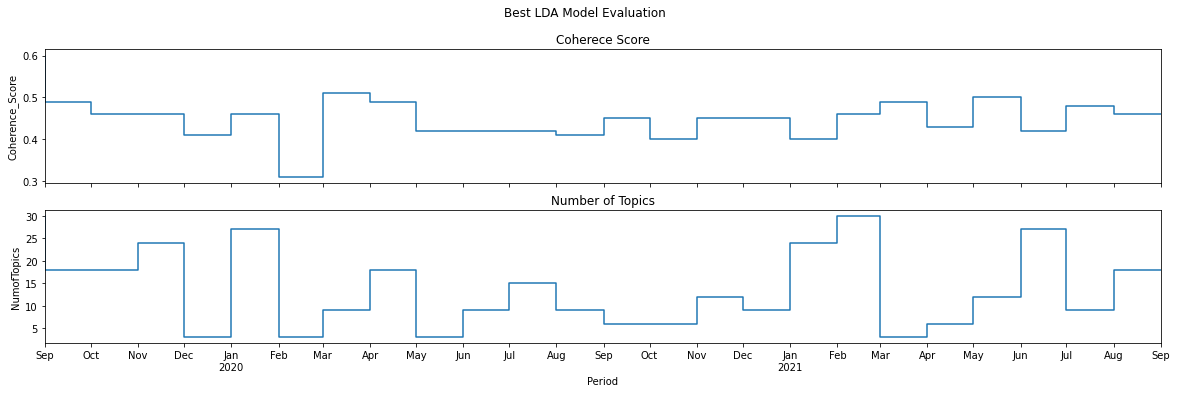

In [ ]:

fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(20,6), sharex=True)
sns.lineplot(data= model_eval_df, y='Coherence_Score', x= model_eval_df.index,drawstyle='steps-pre', ax=ax1)
sns.lineplot(data= model_eval_df, y='NumofTopics', x= model_eval_df.index, drawstyle='steps-pre', ax=ax2)
ax1.set_title('Coherece Score')
ax2.set_title('Number of Topics')
fig.suptitle('Best LDA Model Evaluation')

locator = mdates.MonthLocator()
formatter = mdates.ConciseDateFormatter(locator)
ax2.xaxis.set_major_locator(locator)
ax2.xaxis.set_major_formatter(formatter)

# Set major and minor date tick locators
maj_loc = mdates.MonthLocator(bymonth=np.arange(1,13,1))
ax2.xaxis.set_major_locator(maj_loc)
# min_loc = mdates.MonthLocator()
# ax.xaxis.set_minor_locator(min_loc)

# Set major date tick formatter
zfmts = ['', '%b\n%Y', '%b', '%b-%d', '%H:%M', '%H:%M']
maj_fmt = mdates.ConciseDateFormatter(maj_loc, zero_formats=zfmts, show_offset=False)
ax2.xaxis.set_major_formatter(maj_fmt)

ax2.figure.autofmt_xdate(rotation=0, ha='center')
ax2.set_xlim(model_eval_df.index.min(), model_eval_df.index.max());

The above plot shows the number of topics for the `best` candidate lda model after tuning of the hyperparameters. The `best` LDA model had the highest coherence score for a given month. We can see that the wide variation in the number of topics being identified for each month. The number of topics varies between the lower count of 3 and upper count of 30. 
The coherence scores for all the `best` models are more than 0.4 except for the March-2020 model

**Token Counts in the Topics to Investigate Whether to Add them to StopWords**

In [ ]:
topics_tolist = model_eval_df['Topics'].tolist()
topics_toflatlist1 = [item for sublist in topics_tolist for item in sublist]
topics_toflatlist2 = [item for sublist in topics_toflatlist1 for item in sublist]

In [ ]:
topics_word_counter = Counter(topics_toflatlist2)
topics_word_counter.most_common(15)

[('india', 135),
 ('day', 101),
 ('today', 75),
 ('good', 68),
 ('year', 56),
 ('time', 54),
 ('people', 53),
 ('thank', 43),
 ('new', 38),
 ('happy', 37),
 ('shri', 36),
 ('wish', 28),
 ('case', 27),
 ('indian', 25),
 ('love', 21)]

In [ ]:
from tqdm import tqdm

def trending_topics_over_time(model, tokens, start=0, end=1):

  id2word = Dictionary(tokens.tolist())
  id2word.filter_extremes(no_below=2, no_above=.99)
  corpus = [id2word.doc2bow(d) for d in tokens]
  # id_wordszz = [[id2word[id] for id, count in line] for line in corpus]

  corpus_sel = corpus[start:end]
  dominant_topics = []
  topic_percentages = []
  for i, corp in (enumerate(corpus_sel)):
    topic_percs, wordid_topics, wordid_phivalues = model[corp]
    dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
    dominant_topics.append((i, dominant_topic))
    topic_percentages.append(topic_percs)
  return(dominant_topics, topic_percentages)

In [ ]:
model_eval_ls = []
ls_df_dominant_topic_in_each_doc = []
ls_df_topic_weightage_by_doc = []
ls_df_top3words = []
# del id2word
# del corpus
# del id_wordszz
# del best_lda_model
# del tokens

p = Path(models_dir)
best_lda_model_files = [i.stem for i in p.glob('best_lda_*.gensim')]
for best_lda_model_file in tqdm(best_lda_model_files[:], total=(len(best_lda_model_files))):
  _, _, year, month = re.split('_|-',best_lda_model_file)
  year = int(year)
  month = int(month)
  print(f'Evaluating Models for the Period = {year}-{month},', end= "\n")
  best_lda_model = LdaMulticore.load(os.path.join(models_dir, f'{best_lda_model_file}.gensim'))

  day = 1
  mdate = date(year, month, day) #models were saved wrongly. for 2019-9 correspond to dates >2019-9-30 and <=2019-10-31
  mask = (df_swach['date'] >= mdate) & (df_swach['date'] < mdate + relativedelta(months=1))
  tokens = df_swach.loc[mask, 'spacy_lemma_tokens']

  dominant_topics, topic_percentages = trending_topics_over_time(model=best_lda_model, tokens=tokens, end=-1)

  # Distribution of Dominant Topics in Each Document
  df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
  dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
  df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()
  df_dominant_topic_in_each_doc['Period'] = date(year, month, 1)
  ls_df_dominant_topic_in_each_doc.append(df_dominant_topic_in_each_doc)

  # file = 'df_dominant_topic_in_each_doc.csv'
  # df_dominant_topic_in_each_doc.to_csv(os.path.join(csv_dir, file))

  # Total Topic Distribution by actual weight
  topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
  df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()
  df_topic_weightage_by_doc['Period'] = date(year, month, 1)
  ls_df_topic_weightage_by_doc.append(df_topic_weightage_by_doc)
  # file = 'df_topic_weightage_by_doc.csv'
  # df_topic_weightage_by_doc.to_csv(os.path.join(csv_dir, file))

  # Top 3 Keywords for each Topic
  topic_top3words = [(i, topic) for i, topics in best_lda_model.show_topics(formatted=False, num_topics=30) 
                                  for j, (topic, wt) in enumerate(topics) if j < 3]

  df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
  df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
  df_top3words.reset_index(level=0,inplace=True)
  df_top3words['Period'] = date(year, month, 1)
  ls_df_top3words.append(df_top3words)

df_dominant_topic_in_each_doc = pd.concat(ls_df_dominant_topic_in_each_doc)
df_topic_weightage_by_doc = pd.concat(ls_df_topic_weightage_by_doc)
df_top3words = pd.concat(ls_df_top3words)

  0%|          | 0/25 [00:00<?, ?it/s]

Evaluating Models for the Period = 2021-4,


  4%|▍         | 1/25 [00:07<02:59,  7.48s/it]

Evaluating Models for the Period = 2021-5,


  8%|▊         | 2/25 [00:18<03:39,  9.56s/it]

Evaluating Models for the Period = 2021-6,


 12%|█▏        | 3/25 [00:29<03:44, 10.21s/it]

Evaluating Models for the Period = 2021-7,


 16%|█▌        | 4/25 [00:49<04:52, 13.93s/it]

Evaluating Models for the Period = 2021-8,


 20%|██        | 5/25 [01:02<04:34, 13.73s/it]

Evaluating Models for the Period = 2021-9,


 24%|██▍       | 6/25 [01:16<04:22, 13.84s/it]

Evaluating Models for the Period = 2020-10,


 28%|██▊       | 7/25 [01:24<03:33, 11.86s/it]

Evaluating Models for the Period = 2020-11,


 32%|███▏      | 8/25 [01:32<03:00, 10.63s/it]

Evaluating Models for the Period = 2020-12,


 36%|███▌      | 9/25 [01:45<03:03, 11.44s/it]

Evaluating Models for the Period = 2021-1,


 40%|████      | 10/25 [01:58<02:57, 11.80s/it]

Evaluating Models for the Period = 2021-2,


 44%|████▍     | 11/25 [02:18<03:22, 14.47s/it]

Evaluating Models for the Period = 2021-3,


 48%|████▊     | 12/25 [02:38<03:31, 16.24s/it]

Evaluating Models for the Period = 2020-4,


 52%|█████▏    | 13/25 [02:52<03:03, 15.27s/it]

Evaluating Models for the Period = 2020-5,


 56%|█████▌    | 14/25 [03:08<02:52, 15.66s/it]

Evaluating Models for the Period = 2020-6,


 60%|██████    | 15/25 [03:16<02:14, 13.44s/it]

Evaluating Models for the Period = 2020-7,


 64%|██████▍   | 16/25 [03:29<01:57, 13.08s/it]

Evaluating Models for the Period = 2020-8,


 68%|██████▊   | 17/25 [03:43<01:48, 13.59s/it]

Evaluating Models for the Period = 2020-9,


 72%|███████▏  | 18/25 [03:54<01:29, 12.78s/it]

Evaluating Models for the Period = 2019-9,


 76%|███████▌  | 19/25 [03:55<00:54,  9.08s/it]

Evaluating Models for the Period = 2019-10,


 80%|████████  | 20/25 [04:08<00:52, 10.43s/it]

Evaluating Models for the Period = 2019-11,


 84%|████████▍ | 21/25 [04:23<00:47, 11.76s/it]

Evaluating Models for the Period = 2019-12,


 88%|████████▊ | 22/25 [04:45<00:44, 14.71s/it]

Evaluating Models for the Period = 2020-1,


 92%|█████████▏| 23/25 [04:53<00:25, 12.64s/it]

Evaluating Models for the Period = 2020-2,


 96%|█████████▌| 24/25 [05:11<00:14, 14.43s/it]

Evaluating Models for the Period = 2020-3,


100%|██████████| 25/25 [05:18<00:00, 12.74s/it]


In [ ]:
s1 = df_dominant_topic_in_each_doc.copy()
s2 = df_topic_weightage_by_doc.copy()
s3 = df_top3words.copy()

In [ ]:
df_dominant_topic_in_each_doc.set_index('Period', inplace=True)
df_dominant_topic_in_each_doc.index = pd.to_datetime(df_dominant_topic_in_each_doc.index)
df_dominant_topic_in_each_doc.sort_values(by=['Period', 'count'], ascending=[True, False], inplace=True)
df_dominant_topic_in_each_doc

,Dominant_Topic,count
Period,,
2019-09-01,0,208
2019-09-01,1,84
2019-09-01,2,46
2019-09-01,3,18
2019-09-01,4,18
...,...,...
2021-09-01,14,20
2021-09-01,10,18
2021-09-01,17,16


In [ ]:
df_topic_weightage_by_doc.set_index('Period', inplace=True)
df_topic_weightage_by_doc.index = pd.to_datetime(df_topic_weightage_by_doc.index)
df_topic_weightage_by_doc.sort_values(by=['Period', 'count'], ascending=[True, False], inplace=True)
df_topic_weightage_by_doc

,index,count
Period,,
2019-09-01,0,168.719454
2019-09-01,1,75.639015
2019-09-01,2,41.855506
2019-09-01,3,19.174009
2019-09-01,4,18.509334
...,...,...
2021-09-01,10,29.873849
2021-09-01,15,29.709591
2021-09-01,14,29.508857


In [ ]:
df_top3words.set_index('Period', inplace=True)
df_top3words.index = pd.to_datetime(df_top3words.index)
df_top3words.sort_values(by=['Period', 'topic_id'], ascending=[True, True], inplace=True)
df_top3words

,topic_id,words
Period,,
2019-09-01,0,"child, \nthank, \nright"
2019-09-01,1,"celebrate, \nmodi, \nstudent"
2019-09-01,2,"win, \nwait, \nchild"
2019-09-01,3,"review, \nidea, \nsweet"
2019-09-01,4,"minister, \nnation, \nyear"
...,...,...
2021-09-01,13,"construction, \nsite, \nbuilding"
2021-09-01,14,"minister, \ngermany, \ncounter"
2021-09-01,15,"roy, \nfish, \nadoption"


In [ ]:
pd.set_option("display.max_rows", 50)
df_dominant_topic_in_each_doc_grouped = df_dominant_topic_in_each_doc.groupby([df_dominant_topic_in_each_doc.index, 'Dominant_Topic'])['count'].sum()
df_dominant_topic_in_each_doc_grouped = df_dominant_topic_in_each_doc_grouped.groupby(level=[0]).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()
df_dominant_topic_in_each_doc_grouped.set_index('Period', inplace=True)
df_dominant_topic_in_each_doc_grouped

,Dominant_Topic,count
Period,,
2019-09-01,0,46.017699
2019-09-01,1,18.584071
2019-09-01,2,10.176991
2019-09-01,3,3.982301
2019-09-01,4,3.982301
...,...,...
2021-09-01,13,0.229683
2021-09-01,14,0.135108
2021-09-01,15,0.202662


In [ ]:
df_dominant_topic_in_each_doc_grouped[df_dominant_topic_in_each_doc_grouped['Dominant_Topic']==0]

,Dominant_Topic,count
Period,,
2019-09-01,0,65.486726
2019-10-01,0,62.790370
2019-11-01,0,79.047128
2019-12-01,0,90.153653
2020-01-01,0,78.565953
2020-02-01,0,84.050798
2020-03-01,0,90.063746
2020-04-01,0,92.581318
2020-05-01,0,65.860562


In [ ]:
df_topic_weightage_by_doc_grouped = df_topic_weightage_by_doc.groupby([df_topic_weightage_by_doc.index, 'index'])['count'].sum()

df_topic_weightage_by_doc_grouped = df_topic_weightage_by_doc_grouped.groupby(level=[0]).apply(lambda x:
                                                 100 * x / float(x.sum())).reset_index()

df_topic_weightage_by_doc_grouped.set_index('Period', inplace=True)
df_topic_weightage_by_doc_grouped

,index,count
Period,,
2019-09-01,0,41.419816
2019-09-01,1,18.569015
2019-09-01,2,10.275326
2019-09-01,3,4.707127
2019-09-01,4,4.543953
...,...,...
2021-09-01,13,0.287754
2021-09-01,14,0.212501
2021-09-01,15,0.213947


## Wordcloud of Top Topic Over Time

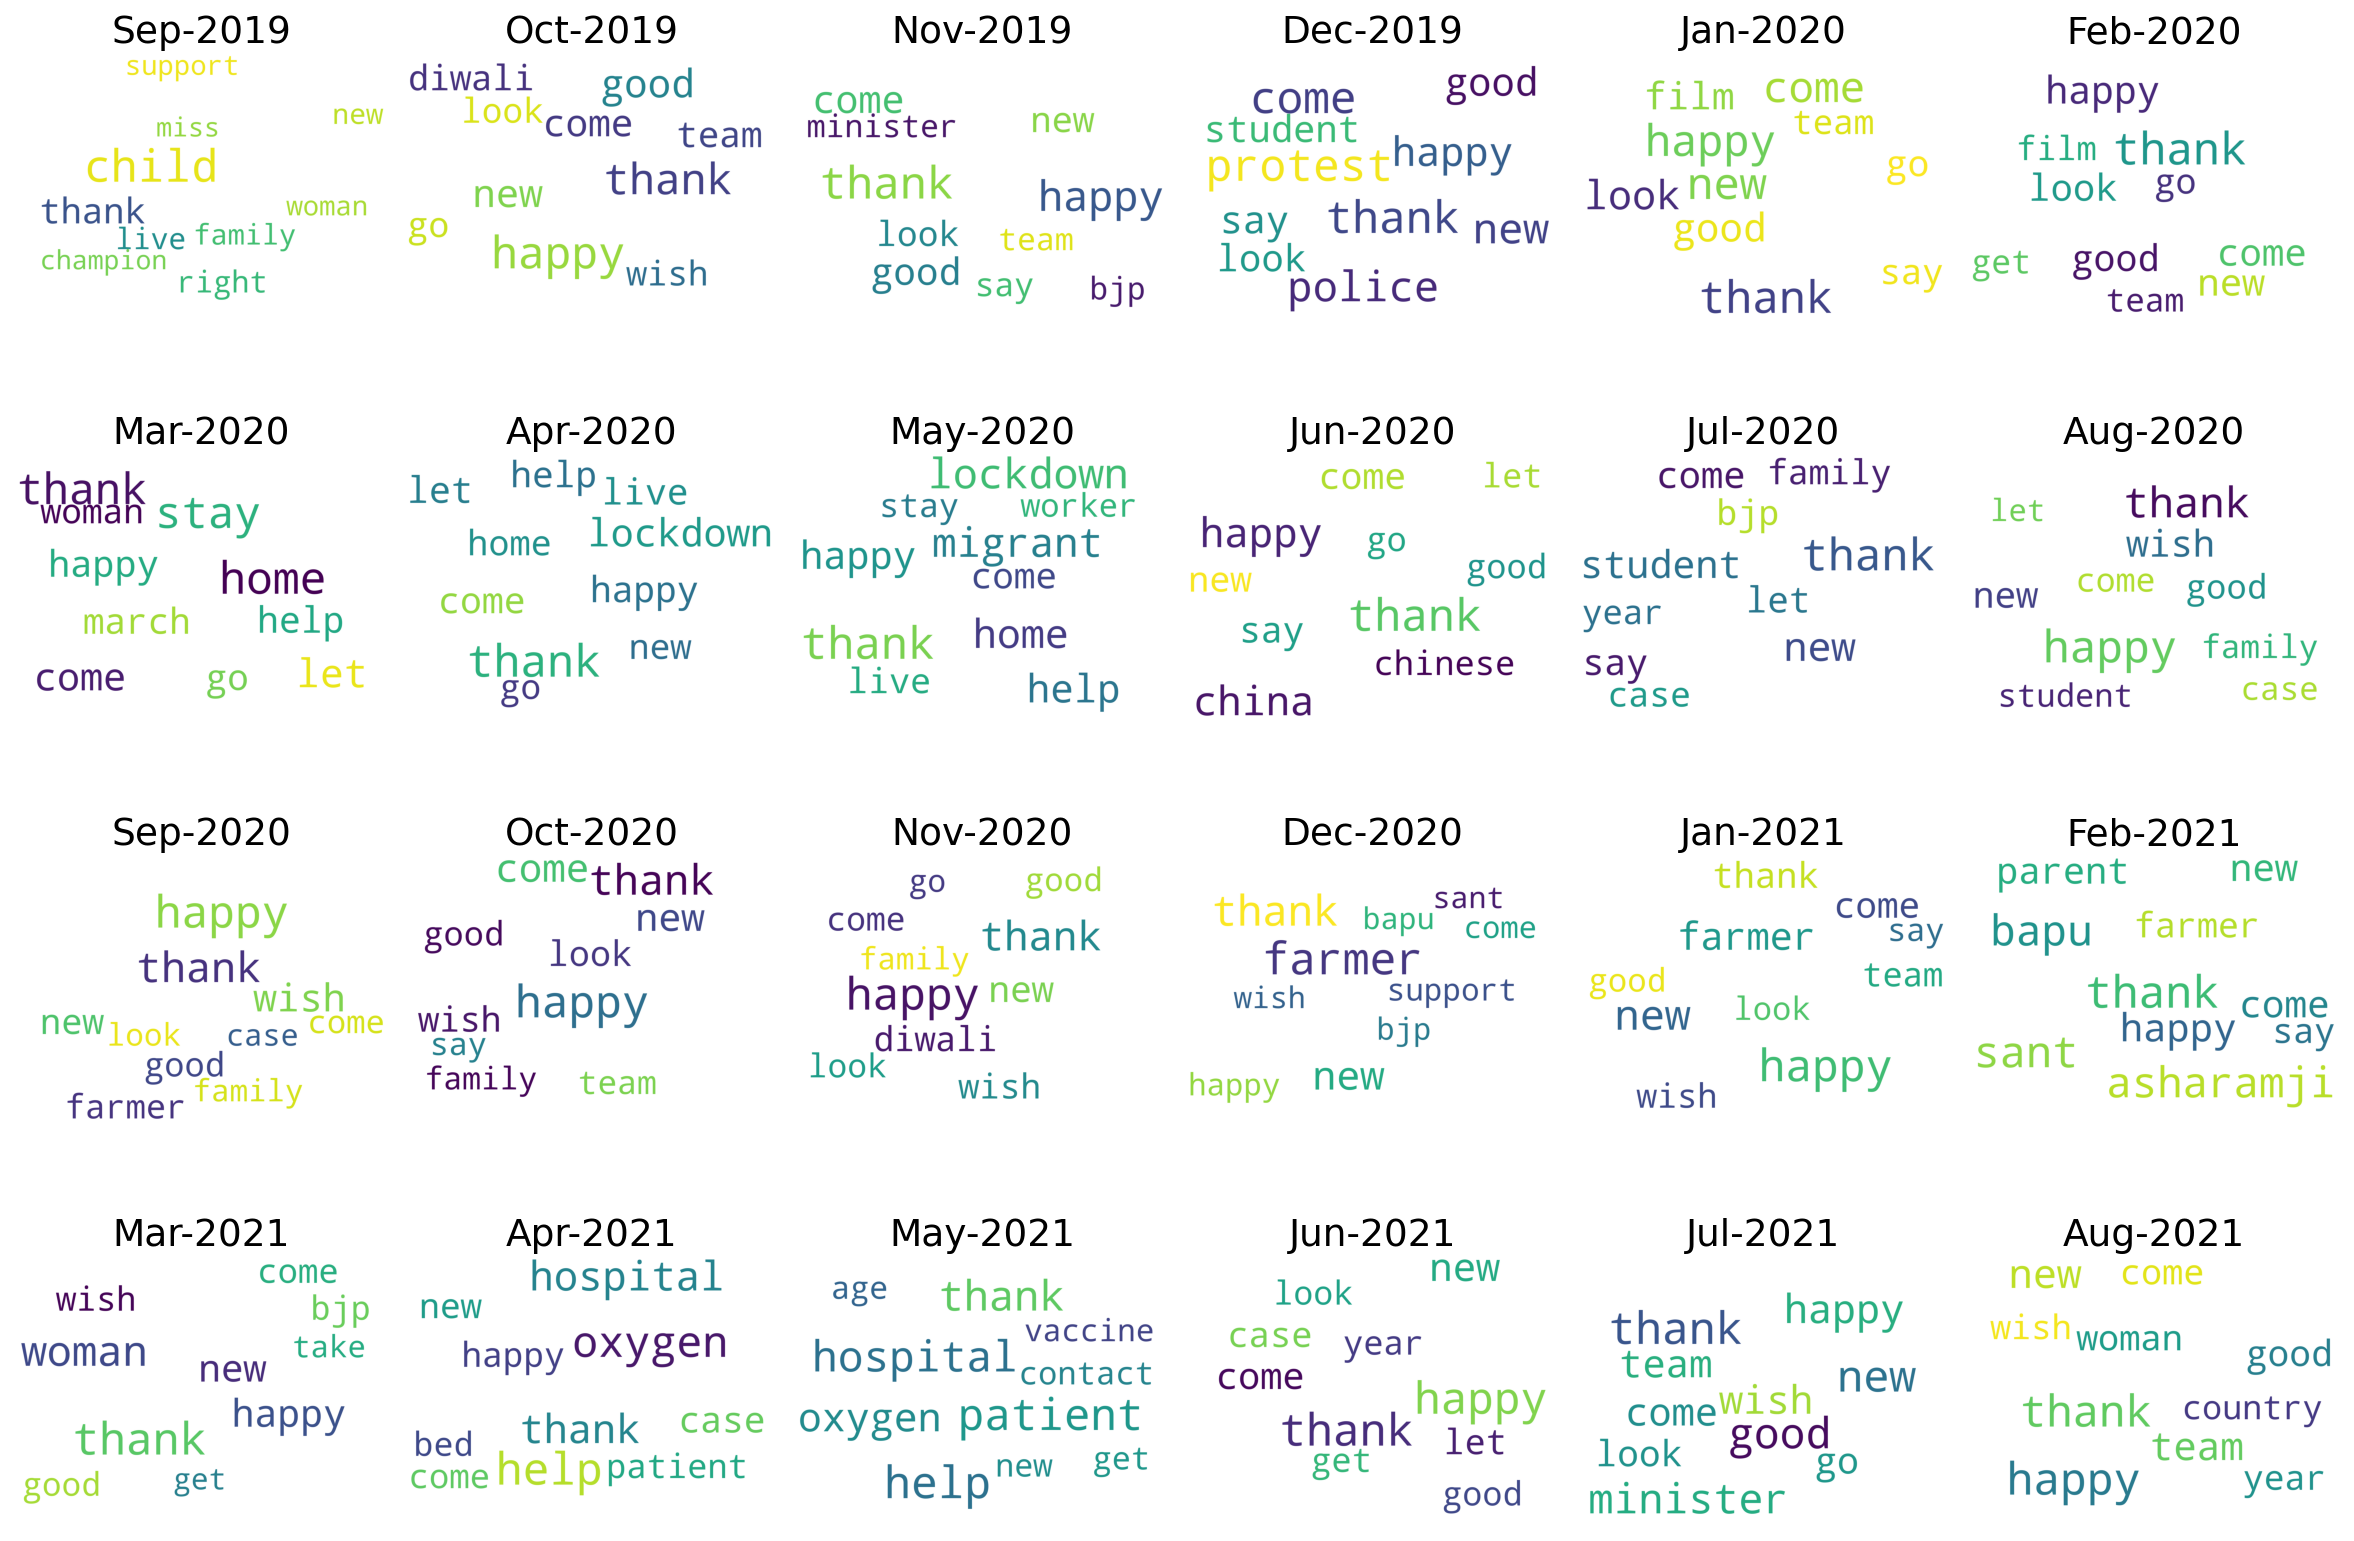

In [ ]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]  # more colors: 'mcolors.XKCD_COLORS'

cloud = WordCloud(stopwords=stopwords_set,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  # colormap='tab10',
                  # color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

sdate = date(2019,9,1)   # start date
edate = date(2021,9,1)   # end date

dates = pd.date_range(sdate,edate,freq='MS')
dates = dates.date
best_lda_model_topics = []
for mdate in dates:
  year = int(mdate.year)
  month = int(mdate.month)
  period = f'{year}-{month}'
  best_lda_model_file = f'best_lda_{period}.gensim'
  best_lda_model = LdaMulticore.load(os.path.join(models_dir, f'{best_lda_model_file}'))
  topics = best_lda_model.show_topics(formatted=False, num_topics=1)
  best_lda_model_topics.append(topics)

fig, axes = plt.subplots(4,6,figsize=(20,14), sharex=True, sharey=True, dpi=150)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(best_lda_model_topics[i][0][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    # plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().set_title(f'{dates[i].strftime("%b")}-{dates[i].year}', fontdict=dict(size=18, weight='medium'))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0.05, hspace=0.05)
plt.axis('off')
plt.margins(x=0, y=0)
# plt.tight_layout()
plt.show()

The topics which can be interpreted for each of the month are as follows:
- Sep-2019: very small dataset so not a coherent topic
- Oct - 2019: Diwali wishes
- Nov - 2019 Thanking for Birthday wishes
- Dec - 2019: Student protests
- Jan -2020: Film promotion
- Feb - 2020: Film promotion
- Mar - 2020: Stay home covid messages
- Apr - 2020: Lockdown
- May -2020: Lockdown and Migrant worker crisis
- Jun - 2020: China-India border skirmishes
- Jul -2020: Family+Student, possibly related to school shutdowns due to covid
- Aug -2020: Family+Student, possibly related to school shutdowns due to covid
- Sep - 2020: Thank you tweets
- Oct - 2020: Thank you tweets
- Nov - 2020: Diwali wishes
- Dec -2020: Farmers protest
- Jan - 2021: Farmers protest
- Feb -2021: Birthday wishes to guru
- Mar -2021: Woman+Thank you messages
- Apr - 2021: Covid 2nd wave, Oxygen and Hospital help
- May - 2021: Covid 2nd wave, Oxygen and Hospital help
- June -2021: End of 2nd Covid wave, Happy messages
- Jul 2021: Birthday wishes
- Aug -2021: India England Cricket Series


Note that a lot of these topics have words like `happy`, `thank` `wish` `good` repeating for almost all the months. These are possibly related to tweets either birthday wishes to some famous person and that person thanking their followers for the wishes.
This is actually an artifact of the way Twitter shows past search results when the tweets are scraped by location. I noticed that the search results do not reflect or capture all the tweets for a given search parameter. Twitter somehow hides the search results from its public query database. The resuls could have been more representative if I had used the enterprise Tweepy API but thats just an assumption at this point. I visually compared the search results shown by Twitter on its webpage vs the tweets scraped by Snscrape and they seem to capture more or less same number of tweets for a given search criteria.

In [ ]:
df_top3words.columns

Index(['topic_id', 'words'], dtype='object')

In [ ]:
df_top3words[df_top3words['topic_id']==0]

,topic_id,words
Period,,
2019-09-01,0,"child, \ngood, \ntime"
2019-10-01,0,"day, \nindia, \ngood"
2019-11-01,0,"india, \ngood, \nday"
2019-12-01,0,"india, \nthank, \ngood"
2020-01-01,0,"good, \nindia, \nday"
2020-02-01,0,"india, \nday, \nlove"
2020-03-01,0,"people, \ntime, \nday"
2020-04-01,0,"people, \ntime, \nday"
2020-05-01,0,"time, \nindia, \npeople"


In [ ]:
(topics[0])

(0,
 [('good', 0.009250928),
  ('happy', 0.007920624),
  ('birthday', 0.0065614483),
  ('india', 0.00633613),
  ('wish', 0.0061371746),
  ('year', 0.0059881057),
  ('day', 0.0059790206),
  ('new', 0.005527433),
  ('thank', 0.0048831287),
  ('time', 0.004493301)])

In [ ]:
best_lda_model_topics[1][0][1]

[('day', 0.00817146),
 ('india', 0.007270207),
 ('good', 0.0067088106),
 ('happy', 0.006370827),
 ('love', 0.005380122),
 ('thank', 0.005087421),
 ('time', 0.0050474913),
 ('wish', 0.004807796),
 ('today', 0.004662924),
 ('year', 0.0045562205)]

## Percentage Contribution of top Topic

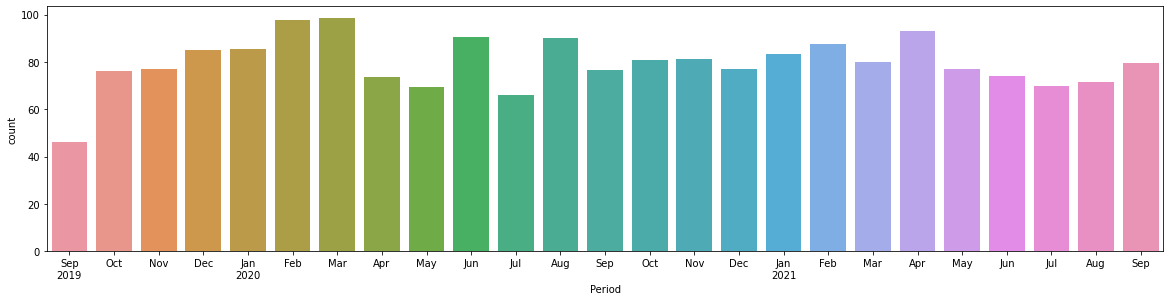

In [ ]:
top_trending_topic_df = df_dominant_topic_in_each_doc_grouped[df_dominant_topic_in_each_doc_grouped['Dominant_Topic']==0]
fig, ax = plt.subplots(figsize=(20,5))
sns.barplot(data= top_trending_topic_df, y='count', x = top_trending_topic_df.index, ax=ax)


# Create list of monthly timestamps by selecting the first weekly timestamp of each
# month (in this example, the first Sunday of each month)
monthly_timestamps = [timestamp for idx, timestamp in enumerate(top_trending_topic_df.index)
                      if (timestamp.month != top_trending_topic_df.index[idx-1].month) | (idx == 0)]

# Automatically select appropriate number of timestamps so that x-axis does
# not get overcrowded with tick labels
step = 1
while len(monthly_timestamps[::step]) > 25: # increase number if time range >3 years
    step += 1
timestamps = monthly_timestamps[::step]

# Create tick labels from timestamps
labels = [ts.strftime('%b\n%Y') if ts.year != timestamps[idx-1].year
          else ts.strftime('%b') for idx, ts in enumerate(timestamps)]

# Set major ticks and labels
ax.set_xticks([top_trending_topic_df.index.get_loc(ts) for ts in timestamps])
ax.set_xticklabels(labels)

# Set minor ticks without labels
ax.set_xticks([top_trending_topic_df.index.get_loc(ts) for ts in monthly_timestamps], minor=True)

# Rotate and center labels
ax.figure.autofmt_xdate(rotation=0, ha='center')



The above plot shows the percentage contribution of the top Topic for a given month. The top topic in general has more than 60% of contribution for almost all months. It is sometimes as high as 90%. These months also coincide with the spike in the number of covid cases which is indicative of the fact that only covid related topics were being discussed.

# Conclusions

- We have a topic model that can identify distinct topics and cluster of words associated with that topic.
- This information can be used to infer the context of a search query and provide a more contextual based result
- GSDMM model identifies far more coherent topics than the LDA model

## Next Steps
- Snscrape API uses Twitter’s public search results to scrape the tweets. Twitter does not display all the past tweets for search queries.
- The scraped tweets were a small selective subset of all the tweets for the time period. Makes the tweet not so representative
- Tune the hyperparameters for the GSDMM model
